In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from scipy import stats
from sklearn.svm import OneClassSVM
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Wash-Trading-Case-Study-for-ERC20-Token-Group-1/data/
data=pd.read_excel("NEAR_token_transaction_data.xlsx")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Wash-Trading-Case-Study-for-ERC20-Token-Group-1/data


# Data Exploration


Data Exploration

In [ ]:
data.tail()

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method
19831,0xbd236aea3d8e798143581b8c941c301916ecdce2e6ef...,20171628,1719353855,2024-06-25 22:17:35,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0xb7e004e47c6d43243ffd1cc44f329d7b3d4bd9ff,80.869797,0x415565b0
19832,0xe6b3867b6a620644689ba43af59f3b3e0eade9c4d764...,20171862,1719356675,2024-06-25 23:04:35,0x6469b34a2a4723163c4902dbbdea728d20693c12,0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea,81.711825,-
19833,0x37dfd226ef55d464641ec94fc675ad3692d9af347132...,20171862,1719356675,2024-06-25 23:04:35,0xe4b7538c2e2bc683a3e84ea67aded2dff6c8cef5,0x28104d4f703ee5b5011cefe106f54efd56f33f95,1198.366157,Swap Compact
19834,0x37dfd226ef55d464641ec94fc675ad3692d9af347132...,20171862,1719356675,2024-06-25 23:04:35,0x28104d4f703ee5b5011cefe106f54efd56f33f95,0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea,706.115108,Swap Compact
19835,0x37dfd226ef55d464641ec94fc675ad3692d9af347132...,20171862,1719356675,2024-06-25 23:04:35,0x28104d4f703ee5b5011cefe106f54efd56f33f95,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,492.251048,Swap Compact


In [ ]:
data.shape

(19836, 8)

In [ ]:
data.columns

Index(['Transaction Hash', 'Blockno', 'UnixTimestamp', 'DateTime (UTC)',
       'From', 'To', 'Quantity', 'Method'],
      dtype='object')

In [ ]:
data.dtypes

,0
Transaction Hash,object
Blockno,int64
UnixTimestamp,int64
DateTime (UTC),datetime64[ns]
From,object
To,object
Quantity,float64
Method,object


In [ ]:
data.describe()

,Blockno,UnixTimestamp,DateTime (UTC),Quantity
count,1.983600e+04,1.983600e+04,19836,19836.000000
mean,1.968441e+07,1.713463e+09,2024-04-18 17:49:02.953417984,377.944387
min,1.890902e+07,1.704069e+09,2024-01-01 00:25:35,0.000000
25%,1.946597e+07,1.710817e+09,2024-03-19 02:58:35,3.213580
50%,1.973666e+07,1.714100e+09,2024-04-26 02:48:23,72.444861
75%,1.993754e+07,1.716527e+09,2024-05-24 05:06:35,293.678666
max,2.017186e+07,1.719357e+09,2024-06-25 23:04:35,750000.000000
std,3.220605e+05,3.898956e+06,NaN,8007.345063


In [ ]:
missing_values = data.isnull().sum()
missing_values

,0
Transaction Hash,0
Blockno,0
UnixTimestamp,0
DateTime (UTC),0
From,0
To,0
Quantity,0
Method,0


In [ ]:
data['Quantity'].unique()

array([3.65938370e+01, 1.04984275e+02, 7.90345859e-02, ...,
       8.17118253e+01, 7.06115108e+02, 4.92251048e+02])

In [ ]:
data['Quantity'].value_counts()

,count
Quantity,
1.000000,480
500.000000,293
300.000000,130
1000.000000,116
800.000000,88
...,...
1394.697664,1
325.422727,1
281.392665,1


In [ ]:
data['Method'].unique()

array(['Sell To Uniswap', '0x415565b0', 'Transfer From',
       'Finalise Near To Eth Transfer', 'Process Route', '-', 'Swap',
       'Transfer', 'Multiplex Multi Hop Sell Token For Token',
       'Transfer To Near', 'Execute Meta Transaction V2',
       'Fill Quote Token To Eth', 'Fill Quote Token To Token',
       'Mooo Z1089603480', 'Simple Swap', 'Relay1Gs Wnfs IQR Oy',
       'Execute', 'Insert Cool Text Z8301034834361545146', '0x00000000',
       'Exec', 'Unoswap', 'Bridge', 'Swap On Uniswap V2Fork',
       'Exec Transaction', 'Mix Swap', 'Remove Liquidity ETH With Permit',
       'Swap Tokens Generic', 'Unwind Pairs', 'Withdraw',
       'Remove Liquidity ETH', 'Buy On Uniswap V2Fork', 'Sell Shares',
       'Fill Quote Eth To Token', 'External Swap',
       'Swap Exact ETH For Tokens', 'Swap Exact Tokens For Tokens',
       'Eth Unoswap', 'Multi Swap', 'Unoswap2', 'Outbound Transfer',
       'Call', 'Swap Simple Mode', 'Execute Transaction', 'Settle Orders',
       'Permit And Ca

In [ ]:
data['Method'].value_counts()

,count
Method,
Swap,9432
0x415565b0,3281
-,2563
Execute,1030
Sell To Uniswap,760
...,...
Withdraw,1
Buy On Uniswap V2Fork,1
Fill Order,1


# Exploratory Data Analysis


In [ ]:
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')

In [ ]:
sample_data = data.sample(n=1000, random_state=42)

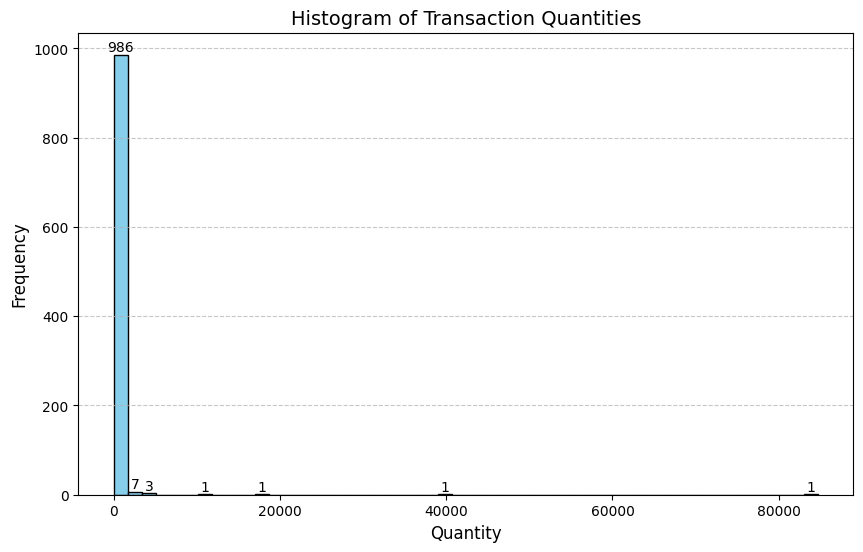

In [ ]:
plt.figure(figsize=(10, 6))

plt.title('Histogram of Transaction Quantities', fontsize=14)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
counts, bins, bars = plt.hist(sample_data['Quantity'], bins=50, color='skyblue', edgecolor='black')
for count, bar in zip(counts, bars):
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width() / 2, height, int(count),
                 ha='center', va='bottom', fontsize=10)
plt.show()

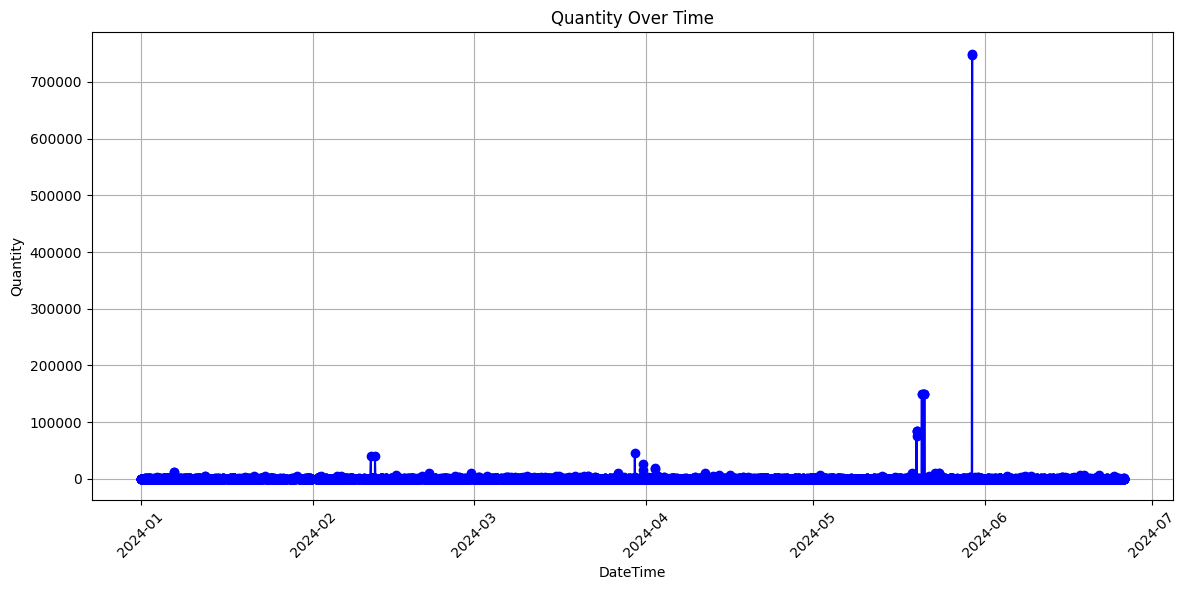

In [ ]:
datetime = pd.to_datetime(data['DateTime (UTC)'])
quantity= pd.to_numeric(data['Quantity'], errors='coerce')

plt.figure(figsize=(12, 6))
plt.plot(datetime, quantity, marker='o', linestyle='-', color='b')
plt.title('Quantity Over Time')
plt.xlabel('DateTime')
plt.ylabel('Quantity')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

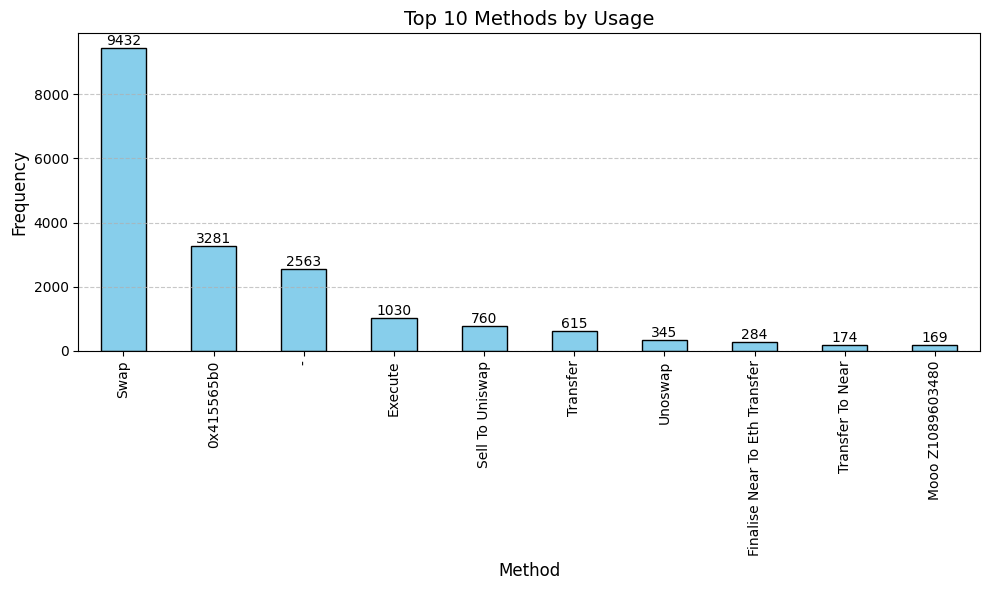

In [ ]:
top_methods=data['Method'].value_counts().head(10)
fd=data[data['Method'].isin(top_methods.index)]
plt.figure(figsize=(10,6))
top_methods.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Methods by Usage', fontsize=14)
plt.xlabel('Method', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
for i, count in enumerate(top_methods):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

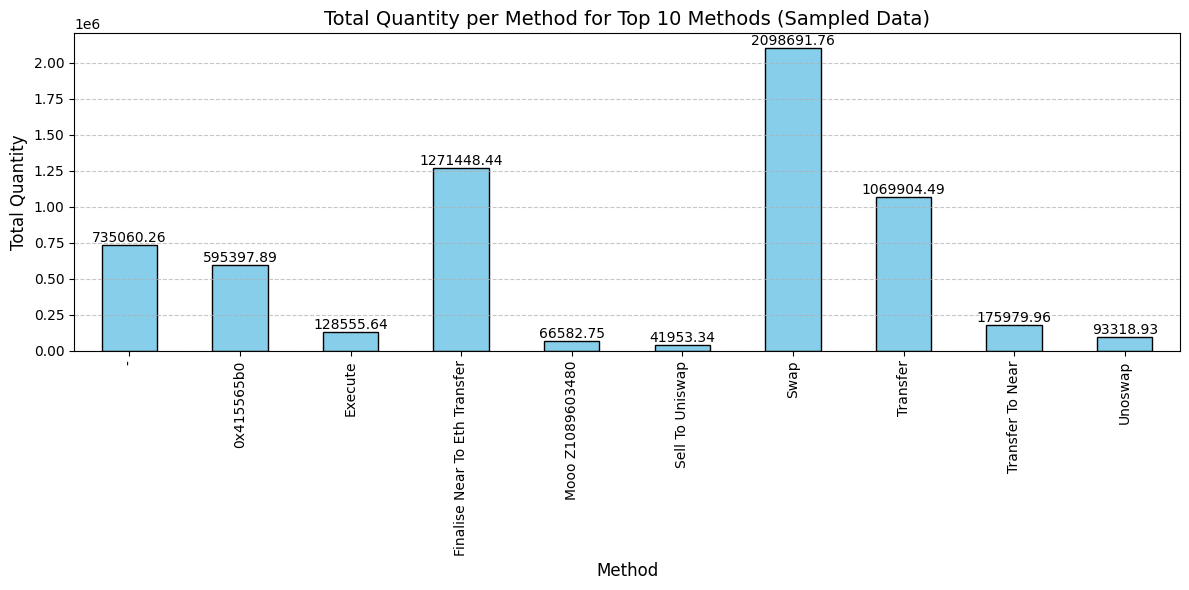

In [ ]:
top_methods = data['Method'].value_counts().head(10).index
filtered_data = data[data['Method'].isin(top_methods)]
quantity_per_method = filtered_data.groupby('Method')['Quantity'].sum()
plt.figure(figsize=(12, 6))
quantity_per_method.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Quantity per Method for Top 10 Methods (Sampled Data)', fontsize=14)
plt.xlabel('Method', fontsize=12)
plt.ylabel('Total Quantity', fontsize=12)
for i, quantity in enumerate(quantity_per_method):
    plt.text(i, quantity, f'{quantity:.2f}', ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

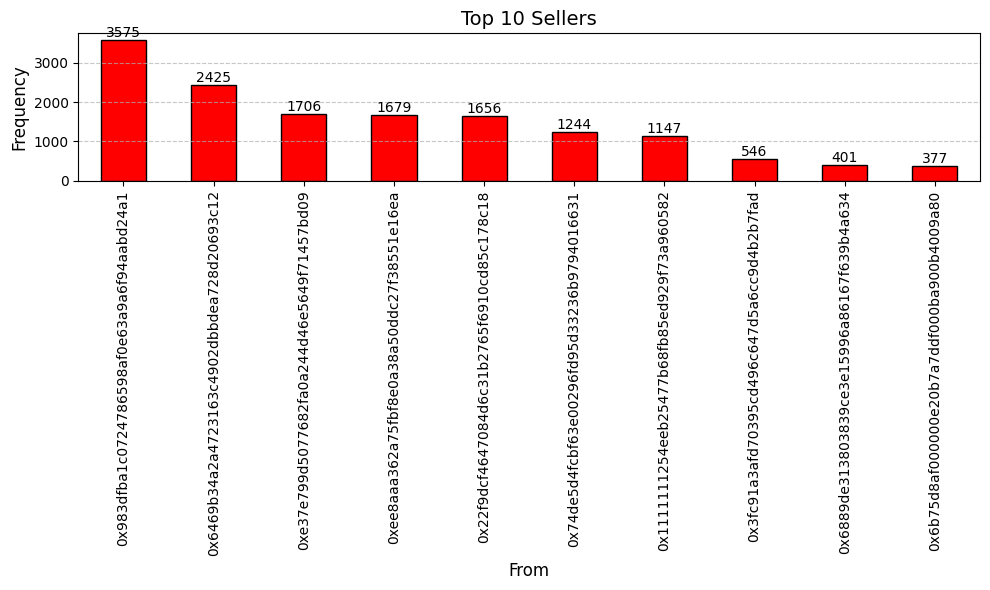

In [ ]:
top_methods=data['From'].value_counts().head(10)
fd=data[data['From'].isin(top_methods.index)]
plt.figure(figsize=(10,6))
top_methods.plot(kind='bar', color='red', edgecolor='black')
plt.title('Top 10 Sellers', fontsize=14)
plt.xlabel('From', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
for i, count in enumerate(top_methods):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

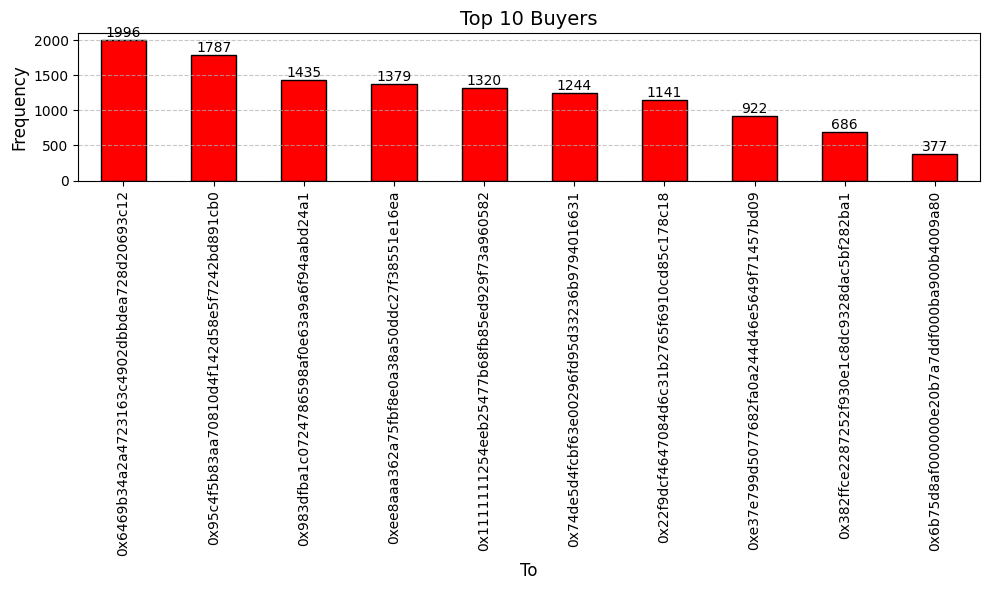

In [ ]:
top_methods=data['To'].value_counts().head(10)
fd=data[data['To'].isin(top_methods.index)]
plt.figure(figsize=(10,6))
top_methods.plot(kind='bar', color='red', edgecolor='black')
plt.title('Top 10 Buyers', fontsize=14)
plt.xlabel('To', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
for i, count in enumerate(top_methods):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

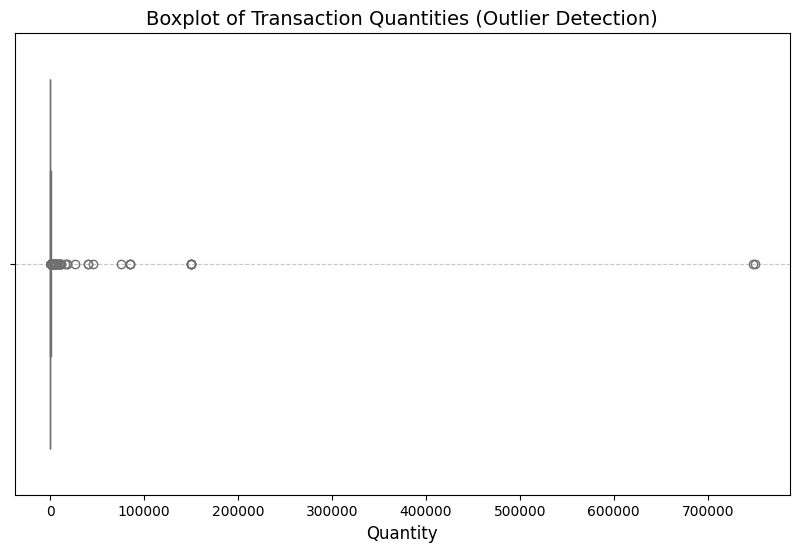

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Quantity', color='skyblue')
plt.title('Boxplot of Transaction Quantities (Outlier Detection)', fontsize=14)
plt.xlabel('Quantity', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Network Analysis


In [ ]:
import networkx as nx

# Initialize a directed graph
G = nx.DiGraph()

# Add edges with weights (Quantity)
for _, row in data.iterrows():
    G.add_edge(row['From'], row['To'], weight=row['Quantity'])


In [ ]:
degree_centrality = nx.degree_centrality(G)


In [ ]:
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')



In [ ]:
closeness_centrality = nx.closeness_centrality(G)


In [ ]:
unique_nodes = set(data['From']).union(set(data['To']))

# Create a DataFrame to store centrality measures
centrality_df = pd.DataFrame(unique_nodes, columns=['Node'])

# Map centrality measures to the nodes
centrality_df['Degree Centrality'] = centrality_df['Node'].map(degree_centrality)
centrality_df['Betweenness Centrality'] = centrality_df['Node'].map(betweenness_centrality)
centrality_df['Closeness Centrality'] = centrality_df['Node'].map(closeness_centrality)

# Merge the centrality measures back to the original dataset
data_with_centrality = data.merge(
    centrality_df, how='left', left_on='From', right_on='Node'
)

data=data_with_centrality

# Display the updated dataset
print(data.head())

                                    Transaction Hash   Blockno  UnixTimestamp  \
0  0x27797428fc8aaf088cc707c8788b5d13580696418c79...  18909018     1704068735   
1  0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...  18909070     1704069371   
2  0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...  18909070     1704069371   
3  0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...  18909070     1704069371   
4  0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9cc...  18909149     1704070319   

       DateTime (UTC)                                        From  \
0 2024-01-01 00:25:35  0x6469b34a2a4723163c4902dbbdea728d20693c12   
1 2024-01-01 00:36:11  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
2 2024-01-01 00:36:11  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
3 2024-01-01 00:36:11  0x22f9dcf4647084d6c31b2765f6910cd85c178c18   
4 2024-01-01 00:51:59  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   

                                           To    Quantity           Method  \
0  0x776a0725094cbf9

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_centrality(graph, centrality, title, top_n=None, show_labels=False, node_size_factor=5000):
    """
    Plots a centrality graph with optional focus on top N nodes and dynamic labeling.

    Arguments:
        graph: NetworkX graph.
        centrality: Dictionary of centrality scores.
        title: Title of the graph.
        top_n: Number of top nodes to display (optional).
        show_labels: Whether to display node labels (default: False).
        node_size_factor: Scaling factor for node sizes (default: 5000).
    """
    plt.figure(figsize=(12, 8))

    # Sort centrality by value (descending)
    sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)

    # Focus on top N nodes (optional)
    if top_n:
        nodes_to_draw = {node for node, _ in sorted_centrality[:top_n]}
        graph = graph.subgraph(nodes_to_draw)
        centrality = {node: centrality[node] for node in nodes_to_draw}

    # Position nodes using spring layout
    pos = nx.spring_layout(graph, seed=42)
    centrality_values = list(centrality.values())

    # Normalize centrality values for color mapping
    vmin = min(centrality_values)
    vmax = max(centrality_values)

    # Draw nodes with size based on centrality and color
    nodes = nx.draw_networkx_nodes(
        graph, pos,
        node_color=centrality_values,
        cmap=plt.cm.viridis,
        node_size=[node_size_factor * val for val in centrality_values],
        vmin=vmin,
        vmax=vmax
    )
    nx.draw_networkx_edges(graph, pos, alpha=0.3, edge_color="gray")

    # Add labels for top N nodes if show_labels is True
    if show_labels:
        nx.draw_networkx_labels(
            graph, pos,
            labels={node: node for node in centrality.keys()},
            font_size=8, font_color="black"
        )

    # Add colorbar explicitly linked to the nodes
    cbar = plt.colorbar(nodes, shrink=0.8)
    cbar.set_label("Centrality Score")

    # Add title
    plt.title(title, fontsize=14)
    plt.axis("off")  # Turn off axis
    plt.show()

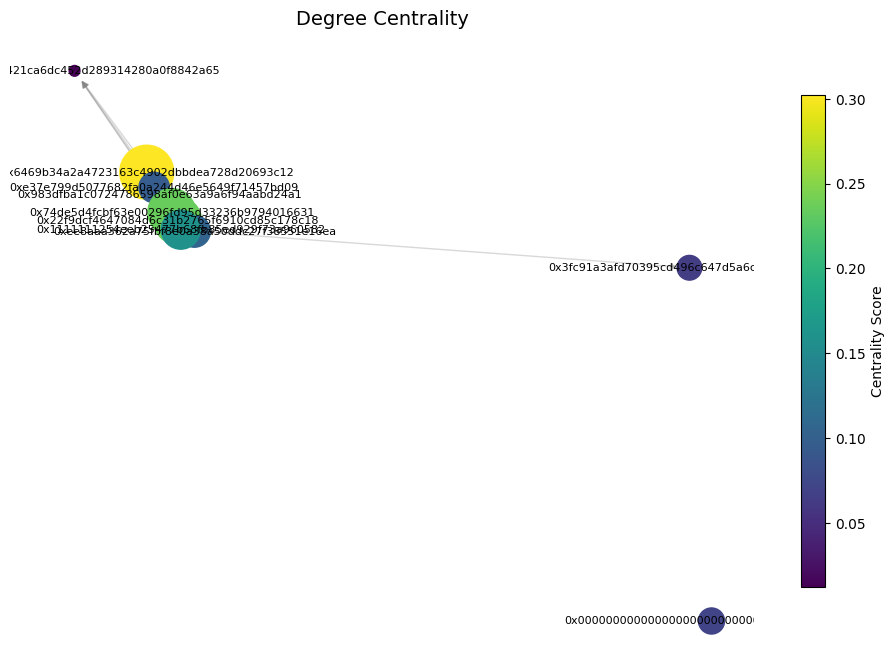

In [ ]:
plot_centrality(G, degree_centrality, 'Degree Centrality', top_n=10, show_labels=True)


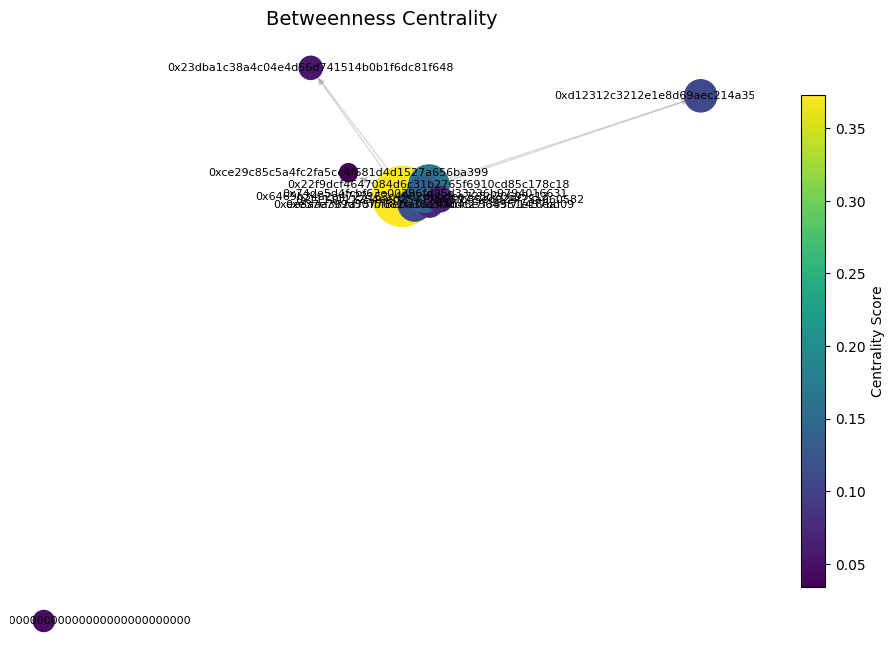

In [ ]:
plot_centrality(G, betweenness_centrality, 'Betweenness Centrality', top_n=10, show_labels=True)

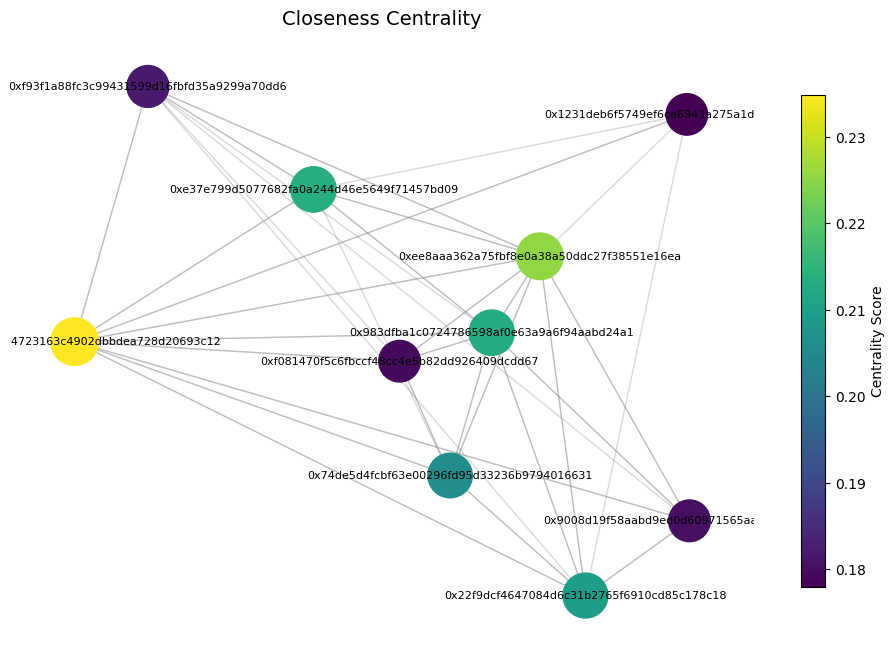

In [ ]:
plot_centrality(G, closeness_centrality, 'Closeness Centrality', top_n=10, show_labels=True)

# Data Cleaning

In [ ]:
missing_data = pd.DataFrame({'Column': missing_values.index, 'Missing Values': missing_values.values})
missing_data['Percentage'] = (missing_data['Missing Values'] / len(data)) * 100
print("Missing Values in Each Column:")
print(missing_data)

Missing Values in Each Column:
             Column  Missing Values  Percentage
0  Transaction Hash               0         0.0
1           Blockno               0         0.0
2     UnixTimestamp               0         0.0
3    DateTime (UTC)               0         0.0
4              From               0         0.0
5                To               0         0.0
6          Quantity               0         0.0
7            Method               0         0.0


<ipython-input-63-42fb63a80f20>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Column', y='Missing Values', data=missing_data, palette='viridis')


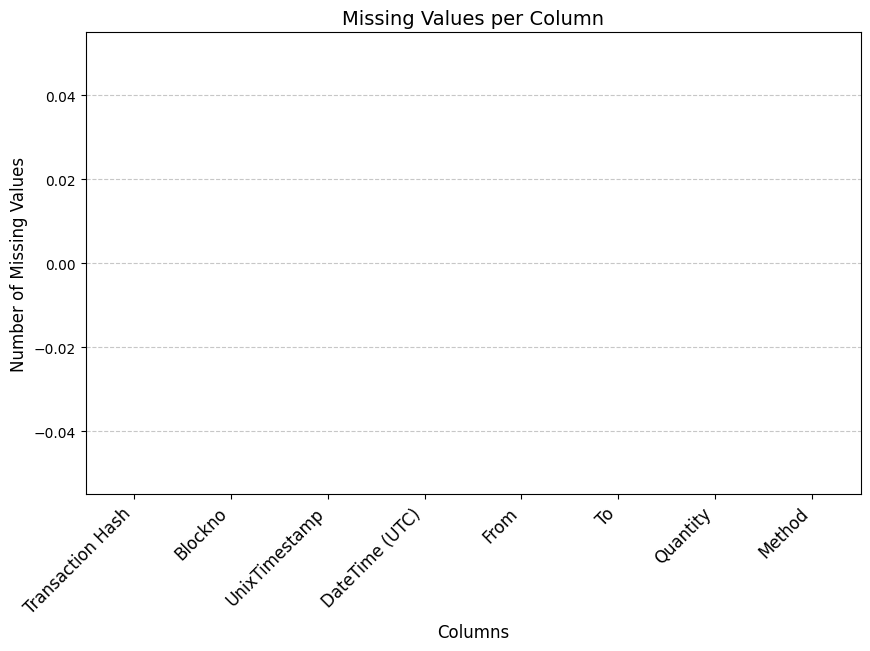

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Column', y='Missing Values', data=missing_data, palette='viridis')
plt.title('Missing Values per Column', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Missing Values', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Thus, there are no missing values

# Feature Engineering

In [ ]:
def basic_feature_engineering(df):
    # Create copy to avoid modifying original data
    df_processed = df.copy()

    # Timestamp processing
    if 'DateTime' in df_processed.columns:
        df_processed['timestamp'] = pd.to_datetime(df_processed['timestamp'])
        df_processed['hour'] = df_processed['timestamp'].dt.hour
        df_processed['day_of_week'] = df_processed['timestamp'].dt.dayofweek

    # Transaction amount features
    if 'Quantity' in df_processed.columns:  # Check for correct column name: 'Quantity'
        df_processed['quantity_log'] = np.log1p(df_processed['Quantity'])

    # Scale numerical features
    numeric_columns = df_processed.select_dtypes(include=['float64', 'int64']).columns
    scaler = StandardScaler()
    df_processed[numeric_columns] = scaler.fit_transform(df_processed[numeric_columns])

    return df_processed

data = basic_feature_engineering(data)

In [ ]:
# Convert 'DateTime (UTC)' to datetime format if it's not already
data['DateTime (UTC)'] = pd.to_datetime(data['DateTime (UTC)'])

# Extract year, month, and day as new features
data['Year'] = data['DateTime (UTC)'].dt.year
data['Month'] = data['DateTime (UTC)'].dt.month
data['Day'] = data['DateTime (UTC)'].dt.day

data.head()


,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,Node,Degree Centrality,Betweenness Centrality,Closeness Centrality,quantity_log,Year,Month,Day
0,0x27797428fc8aaf088cc707c8788b5d13580696418c79...,-2.407653,-2.409375,2024-01-01 00:25:35,0x6469b34a2a4723163c4902dbbdea728d20693c12,0x776a0725094cbf984e31b43d17e8aaec3c88294a,-0.042631,Sell To Uniswap,0x6469b34a2a4723163c4902dbbdea728d20693c12,1.833113,2.380172,1.034928,-0.054120,2024,1,1
1,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,-0.034090,0x415565b0,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,-0.682574,-0.629726,0.519220,0.389716,2024,1,1
2,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0,-0.047191,0x415565b0,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,-0.682574,-0.629726,0.519220,-1.574657,2024,1,1
3,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0xd98d9d8c5a70df5d5d8e39847ce254347a59816b,-0.034090,0x415565b0,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,1.204860,0.637105,0.438022,0.389716,2024,1,1
4,0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9cc...,-2.407246,-2.408968,2024-01-01 00:51:59,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,-0.045921,0x415565b0,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,-0.682574,-0.629726,0.519220,-0.570861,2024,1,1


In [ ]:
# Create bins for Quantity
bins = [0, 100, 500, 1000, 5000, np.inf]
labels = ['0-100', '101-500', '501-1000', '1001-5000', '5000+']
data['Quantity_Binned'] = pd.cut(data['Quantity'], bins=bins, labels=labels)

# Display the updated dataframe with binned quantities
data.tail()


,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,Node,Degree Centrality,Betweenness Centrality,Closeness Centrality,quantity_log,Year,Month,Day,Quantity_Binned
19831,0xbd236aea3d8e798143581b8c941c301916ecdce2e6ef...,1.512858,1.511036,2024-06-25 22:17:35,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0xb7e004e47c6d43243ffd1cc44f329d7b3d4bd9ff,-0.037101,0x415565b0,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,1.204860,0.637105,0.438022,0.279165,2024,6,25,NaN
19832,0xe6b3867b6a620644689ba43af59f3b3e0eade9c4d764...,1.513585,1.511759,2024-06-25 23:04:35,0x6469b34a2a4723163c4902dbbdea728d20693c12,0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea,-0.036996,-,0x6469b34a2a4723163c4902dbbdea728d20693c12,1.833113,2.380172,1.034928,0.283547,2024,6,25,NaN
19833,0x37dfd226ef55d464641ec94fc675ad3692d9af347132...,1.513585,1.511759,2024-06-25 23:04:35,0xe4b7538c2e2bc683a3e84ea67aded2dff6c8cef5,0x28104d4f703ee5b5011cefe106f54efd56f33f95,0.102461,Swap Compact,0xe4b7538c2e2bc683a3e84ea67aded2dff6c8cef5,-1.003384,-0.791498,-1.635668,1.428705,2024,6,25,0-100
19834,0x37dfd226ef55d464641ec94fc675ad3692d9af347132...,1.513585,1.511759,2024-06-25 23:04:35,0x28104d4f703ee5b5011cefe106f54efd56f33f95,0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea,0.040985,Swap Compact,0x28104d4f703ee5b5011cefe106f54efd56f33f95,-1.000710,-0.790384,-2.228837,1.202449,2024,6,25,0-100
19835,0x37dfd226ef55d464641ec94fc675ad3692d9af347132...,1.513585,1.511759,2024-06-25 23:04:35,0x28104d4f703ee5b5011cefe106f54efd56f33f95,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0.014276,Swap Compact,0x28104d4f703ee5b5011cefe106f54efd56f33f95,-1.000710,-0.790384,-2.228837,1.048212,2024,6,25,0-100


In [ ]:
# Sort by DateTime to ensure proper difference calculation
data.sort_values(by='DateTime (UTC)', inplace=True)

# Calculate time difference between transactions in seconds
data['Time_Diff'] = data['DateTime (UTC)'].diff().dt.total_seconds()

data.head()


,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,Node,Degree Centrality,Betweenness Centrality,Closeness Centrality,quantity_log,Year,Month,Day,Quantity_Binned,Time_Diff
0,0x27797428fc8aaf088cc707c8788b5d13580696418c79...,-2.407653,-2.409375,2024-01-01 00:25:35,0x6469b34a2a4723163c4902dbbdea728d20693c12,0x776a0725094cbf984e31b43d17e8aaec3c88294a,-0.042631,Sell To Uniswap,0x6469b34a2a4723163c4902dbbdea728d20693c12,1.833113,2.380172,1.034928,-0.054120,2024,1,1,NaN,NaN
1,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,-0.034090,0x415565b0,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,-0.682574,-0.629726,0.519220,0.389716,2024,1,1,NaN,636.0
2,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0,-0.047191,0x415565b0,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,-0.682574,-0.629726,0.519220,-1.574657,2024,1,1,NaN,0.0
3,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0xd98d9d8c5a70df5d5d8e39847ce254347a59816b,-0.034090,0x415565b0,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,1.204860,0.637105,0.438022,0.389716,2024,1,1,NaN,0.0
4,0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9cc...,-2.407246,-2.408968,2024-01-01 00:51:59,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,-0.045921,0x415565b0,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,-0.682574,-0.629726,0.519220,-0.570861,2024,1,1,NaN,948.0


In [ ]:
# Fill missing values with forward fill method
data.fillna(method='ffill', inplace=True)

# data.dropna(inplace=True)

<ipython-input-68-81347b62a17c>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [ ]:
# Create lagged features for Quantity
for lag in range(1, 4):
    data[f'Quantity_Lag_{lag}'] = data['Quantity'].shift(lag)

data.head()


,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,Node,Degree Centrality,...,Closeness Centrality,quantity_log,Year,Month,Day,Quantity_Binned,Time_Diff,Quantity_Lag_1,Quantity_Lag_2,Quantity_Lag_3
0,0x27797428fc8aaf088cc707c8788b5d13580696418c79...,-2.407653,-2.409375,2024-01-01 00:25:35,0x6469b34a2a4723163c4902dbbdea728d20693c12,0x776a0725094cbf984e31b43d17e8aaec3c88294a,-0.042631,Sell To Uniswap,0x6469b34a2a4723163c4902dbbdea728d20693c12,1.833113,...,1.034928,-0.054120,2024,1,1,NaN,NaN,NaN,NaN,NaN
1,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,-0.034090,0x415565b0,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,-0.682574,...,0.519220,0.389716,2024,1,1,NaN,636.0,-0.042631,NaN,NaN
2,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0,-0.047191,0x415565b0,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,-0.682574,...,0.519220,-1.574657,2024,1,1,NaN,0.0,-0.034090,-0.042631,NaN
3,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0xd98d9d8c5a70df5d5d8e39847ce254347a59816b,-0.034090,0x415565b0,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,1.204860,...,0.438022,0.389716,2024,1,1,NaN,0.0,-0.047191,-0.034090,-0.042631
4,0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9cc...,-2.407246,-2.408968,2024-01-01 00:51:59,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,-0.045921,0x415565b0,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,-0.682574,...,0.519220,-0.570861,2024,1,1,NaN,948.0,-0.034090,-0.047191,-0.034090


In [ ]:
# Calculate rolling mean and standard deviation for Quantity over a window of 5 periods
data['Quantity_Rolling_Mean'] = data['Quantity'].rolling(window=5).mean()
data['Quantity_Rolling_Std'] = data['Quantity'].rolling(window=5).std()

data.head()


,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,Node,Degree Centrality,...,Year,Month,Day,Quantity_Binned,Time_Diff,Quantity_Lag_1,Quantity_Lag_2,Quantity_Lag_3,Quantity_Rolling_Mean,Quantity_Rolling_Std
0,0x27797428fc8aaf088cc707c8788b5d13580696418c79...,-2.407653,-2.409375,2024-01-01 00:25:35,0x6469b34a2a4723163c4902dbbdea728d20693c12,0x776a0725094cbf984e31b43d17e8aaec3c88294a,-0.042631,Sell To Uniswap,0x6469b34a2a4723163c4902dbbdea728d20693c12,1.833113,...,2024,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,-0.034090,0x415565b0,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,-0.682574,...,2024,1,1,NaN,636.0,-0.042631,NaN,NaN,NaN,NaN
2,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0,-0.047191,0x415565b0,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,-0.682574,...,2024,1,1,NaN,0.0,-0.034090,-0.042631,NaN,NaN,NaN
3,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0xd98d9d8c5a70df5d5d8e39847ce254347a59816b,-0.034090,0x415565b0,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,1.204860,...,2024,1,1,NaN,0.0,-0.047191,-0.034090,-0.042631,NaN,NaN
4,0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9cc...,-2.407246,-2.408968,2024-01-01 00:51:59,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,-0.045921,0x415565b0,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,-0.682574,...,2024,1,1,NaN,948.0,-0.034090,-0.047191,-0.034090,-0.040784,0.006334


In [ ]:
# Identify self-trades
data['Is_Self_Trade'] = data['From'] == data['To']

# Count the number of self-trades per account
self_trade_counts = data[data['Is_Self_Trade']].groupby('From').size().reset_index(name='Self_Trade_Count')

# Merge self-trade counts back to the original dataframe
data = data.merge(self_trade_counts, how='left', left_on='From', right_on='From')
data['Self_Trade_Count'].fillna(0, inplace=True)

data.head()


<ipython-input-71-3481f60fac97>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Self_Trade_Count'].fillna(0, inplace=True)


,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,Node,Degree Centrality,...,Day,Quantity_Binned,Time_Diff,Quantity_Lag_1,Quantity_Lag_2,Quantity_Lag_3,Quantity_Rolling_Mean,Quantity_Rolling_Std,Is_Self_Trade,Self_Trade_Count
0,0x27797428fc8aaf088cc707c8788b5d13580696418c79...,-2.407653,-2.409375,2024-01-01 00:25:35,0x6469b34a2a4723163c4902dbbdea728d20693c12,0x776a0725094cbf984e31b43d17e8aaec3c88294a,-0.042631,Sell To Uniswap,0x6469b34a2a4723163c4902dbbdea728d20693c12,1.833113,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.0
1,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,-0.034090,0x415565b0,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,-0.682574,...,1,NaN,636.0,-0.042631,NaN,NaN,NaN,NaN,False,0.0
2,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0,-0.047191,0x415565b0,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,-0.682574,...,1,NaN,0.0,-0.034090,-0.042631,NaN,NaN,NaN,False,0.0
3,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0xd98d9d8c5a70df5d5d8e39847ce254347a59816b,-0.034090,0x415565b0,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,1.204860,...,1,NaN,0.0,-0.047191,-0.034090,-0.042631,NaN,NaN,False,0.0
4,0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9cc...,-2.407246,-2.408968,2024-01-01 00:51:59,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,-0.045921,0x415565b0,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,-0.682574,...,1,NaN,948.0,-0.034090,-0.047191,-0.034090,-0.040784,0.006334,False,0.0


In [ ]:
# Create a function to detect circular trades
def detect_circular_trades(df):
    circular_trades = []
    grouped = df.groupby(['From', 'To'])

    for (from_address, to_address), group in grouped:
        if len(group) > 1:
            circular_trades.append((from_address, to_address))

    return circular_trades

# Apply the circular trade detection function
circular_trade_pairs = detect_circular_trades(data)

# Mark circular trades in the dataframe
for from_addr, to_addr in circular_trade_pairs:
    data.loc[(data['From'] == from_addr) & (data['To'] == to_addr), 'Is_Circular_Trade'] = True

data['Is_Circular_Trade'].fillna(False, inplace=True)

data.head()


<ipython-input-72-ec06702565e5>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Is_Circular_Trade'].fillna(False, inplace=True)
<ipython-input-72-ec06702565e5>:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Is_Circular_Trade'].fillna(False, inplace=True)


,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,Node,Degree Centrality,...,Quantity_Binned,Time_Diff,Quantity_Lag_1,Quantity_Lag_2,Quantity_Lag_3,Quantity_Rolling_Mean,Quantity_Rolling_Std,Is_Self_Trade,Self_Trade_Count,Is_Circular_Trade
0,0x27797428fc8aaf088cc707c8788b5d13580696418c79...,-2.407653,-2.409375,2024-01-01 00:25:35,0x6469b34a2a4723163c4902dbbdea728d20693c12,0x776a0725094cbf984e31b43d17e8aaec3c88294a,-0.042631,Sell To Uniswap,0x6469b34a2a4723163c4902dbbdea728d20693c12,1.833113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.0,True
1,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,-0.034090,0x415565b0,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,-0.682574,...,NaN,636.0,-0.042631,NaN,NaN,NaN,NaN,False,0.0,True
2,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0,-0.047191,0x415565b0,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,-0.682574,...,NaN,0.0,-0.034090,-0.042631,NaN,NaN,NaN,False,0.0,True
3,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0xd98d9d8c5a70df5d5d8e39847ce254347a59816b,-0.034090,0x415565b0,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,1.204860,...,NaN,0.0,-0.047191,-0.034090,-0.042631,NaN,NaN,False,0.0,False
4,0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9cc...,-2.407246,-2.408968,2024-01-01 00:51:59,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,-0.045921,0x415565b0,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,-0.682574,...,NaN,948.0,-0.034090,-0.047191,-0.034090,-0.040784,0.006334,False,0.0,True


In [ ]:
# Calculate trade frequency per account
trade_frequency = data.groupby('From')['Transaction Hash'].count().reset_index(name='Trade_Frequency')

# Merge trade frequency back to the original dataframe
data = data.merge(trade_frequency, how='left', left_on='From', right_on='From')

data.head()


,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,Node,Degree Centrality,...,Time_Diff,Quantity_Lag_1,Quantity_Lag_2,Quantity_Lag_3,Quantity_Rolling_Mean,Quantity_Rolling_Std,Is_Self_Trade,Self_Trade_Count,Is_Circular_Trade,Trade_Frequency
0,0x27797428fc8aaf088cc707c8788b5d13580696418c79...,-2.407653,-2.409375,2024-01-01 00:25:35,0x6469b34a2a4723163c4902dbbdea728d20693c12,0x776a0725094cbf984e31b43d17e8aaec3c88294a,-0.042631,Sell To Uniswap,0x6469b34a2a4723163c4902dbbdea728d20693c12,1.833113,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.0,True,2425
1,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,-0.034090,0x415565b0,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,-0.682574,...,636.0,-0.042631,NaN,NaN,NaN,NaN,False,0.0,True,3575
2,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0,-0.047191,0x415565b0,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,-0.682574,...,0.0,-0.034090,-0.042631,NaN,NaN,NaN,False,0.0,True,3575
3,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0xd98d9d8c5a70df5d5d8e39847ce254347a59816b,-0.034090,0x415565b0,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,1.204860,...,0.0,-0.047191,-0.034090,-0.042631,NaN,NaN,False,0.0,False,1656
4,0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9cc...,-2.407246,-2.408968,2024-01-01 00:51:59,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,-0.045921,0x415565b0,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,-0.682574,...,948.0,-0.034090,-0.047191,-0.034090,-0.040784,0.006334,False,0.0,True,3575


In [ ]:
# Create a function to identify common funders
def identify_common_funders(df):
    funder_map = {}

    for _, row in df.iterrows():
        if row['Quantity'] > 0:  # Only consider positive quantities for funding transactions
            funder_map.setdefault(row['To'], []).append(row['From'])

    return funder_map

common_funders = identify_common_funders(data)

# Convert common funders dictionary to DataFrame for analysis
funder_df = pd.DataFrame([(k, v) for k, v in common_funders.items()], columns=['Account', 'Funded_By'])

funder_df.head()


,Account,Funded_By
0,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,"[0xa6381631e0634e97e23a80a3c57f9582aa959e16, 0..."
1,0x1bed9baea3d71354e6b092d4789a639ecc76eaa8,[0x22f9dcf4647084d6c31b2765f6910cd85c178c18]
2,0xa6381631e0634e97e23a80a3c57f9582aa959e16,"[0x983dfba1c0724786598af0e63a9a6f94aabd24a1, 0..."
3,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,"[0x983dfba1c0724786598af0e63a9a6f94aabd24a1, 0..."
4,0x6469b34a2a4723163c4902dbbdea728d20693c12,"[0x983dfba1c0724786598af0e63a9a6f94aabd24a1, 0..."


In [ ]:

data['DateTime'] = pd.to_datetime(data['DateTime (UTC)'])

# Set time window
time_window = '1H'

# Calculate transaction frequency
transaction_frequency = data.groupby(['From', pd.Grouper(key='DateTime', freq=time_window)]).size().reset_index(name='Transaction_Count')

# Merge back to original DataFrame
data = data.merge(transaction_frequency, on=['From', 'DateTime'], how='left')
data.head()


<ipython-input-75-405d0b01b2d4>:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  transaction_frequency = data.groupby(['From', pd.Grouper(key='DateTime', freq=time_window)]).size().reset_index(name='Transaction_Count')


,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,Node,Degree Centrality,...,Quantity_Lag_2,Quantity_Lag_3,Quantity_Rolling_Mean,Quantity_Rolling_Std,Is_Self_Trade,Self_Trade_Count,Is_Circular_Trade,Trade_Frequency,DateTime,Transaction_Count
0,0x27797428fc8aaf088cc707c8788b5d13580696418c79...,-2.407653,-2.409375,2024-01-01 00:25:35,0x6469b34a2a4723163c4902dbbdea728d20693c12,0x776a0725094cbf984e31b43d17e8aaec3c88294a,-0.042631,Sell To Uniswap,0x6469b34a2a4723163c4902dbbdea728d20693c12,1.833113,...,NaN,NaN,NaN,NaN,False,0.0,True,2425,2024-01-01 00:25:35,NaN
1,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,-0.034090,0x415565b0,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,-0.682574,...,NaN,NaN,NaN,NaN,False,0.0,True,3575,2024-01-01 00:36:11,NaN
2,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0,-0.047191,0x415565b0,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,-0.682574,...,-0.042631,NaN,NaN,NaN,False,0.0,True,3575,2024-01-01 00:36:11,NaN
3,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0xd98d9d8c5a70df5d5d8e39847ce254347a59816b,-0.034090,0x415565b0,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,1.204860,...,-0.034090,-0.042631,NaN,NaN,False,0.0,False,1656,2024-01-01 00:36:11,NaN
4,0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9cc...,-2.407246,-2.408968,2024-01-01 00:51:59,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,-0.045921,0x415565b0,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,-0.682574,...,-0.047191,-0.034090,-0.040784,0.006334,False,0.0,True,3575,2024-01-01 00:51:59,NaN


In [ ]:
# Calculate average price per token over a rolling window
data['Average_Price'] = data['Quantity'] / data['Quantity'].rolling(window=10).mean()

# Identify significant price deviations
data['Price_Manipulation_Ratio'] = data['Quantity'] / data['Average_Price']


In [ ]:
# Sort by DateTime to ensure correct order
data.sort_values(by=['From', 'DateTime'], inplace=True)

# Calculate time difference in seconds
data['Time_Diff'] = data.groupby('From')['DateTime'].diff().dt.total_seconds()
data.head()

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,Node,Degree Centrality,...,Quantity_Rolling_Mean,Quantity_Rolling_Std,Is_Self_Trade,Self_Trade_Count,Is_Circular_Trade,Trade_Frequency,DateTime,Transaction_Count,Average_Price,Price_Manipulation_Ratio
13,0xda5acf232bb67ef707bddd1100399de22958ec868d78...,-2.398369,-2.400058,2024-01-01 10:30:59,0x0000000000000000000000000000000000000000,0x5de0be2b0530fbf72f7f01dc1f9a789226cd2d03,-0.046776,Finalise Near To Eth Transfer,0x0000000000000000000000000000000000000000,-0.345723,...,-0.043429,0.004774,False,0.0,False,284,2024-01-01 10:30:59,NaN,1.143863,-0.040893
133,0x268988274d6fdeaa8ea69cfe5216fb4b2417c13db973...,-2.379431,-2.381040,2024-01-02 07:06:47,0x0000000000000000000000000000000000000000,0x3e720e486eeda2a69ca8a4c8f27fa22e30bbae30,-0.029092,Finalise Near To Eth Transfer,0x0000000000000000000000000000000000000000,-0.345723,...,-0.019815,0.046127,False,0.0,False,284,2024-01-02 07:06:47,NaN,2.538063,-0.011462
221,0xa241e495ac6b8cb3cbe202f92360e7bdd7d94fe9c2b0...,-2.360216,-2.361816,2024-01-03 03:55:59,0x0000000000000000000000000000000000000000,0x65a8f07bd9a8598e1b5b6c0a88f4779dbc077675,0.003827,Finalise Near To Eth Transfer,0x0000000000000000000000000000000000000000,-0.345723,...,-0.006659,0.037772,False,0.0,True,284,2024-01-03 03:55:59,NaN,-0.171117,-0.022367
280,0x674849bc2e38e09e1646b4634d45b1660dabb6f94813...,-2.344216,-2.345781,2024-01-03 21:17:59,0x0000000000000000000000000000000000000000,0x6889de313803839ce3e15996a86167f639b4a634,0.452353,Finalise Near To Eth Transfer,0x0000000000000000000000000000000000000000,-0.345723,...,0.099449,0.202670,False,0.0,True,284,2024-01-03 21:17:59,NaN,10.887301,0.041549
314,0x024e31e1259dc4ce9b66c7c6281fd648d33116fc83df...,-2.335605,-2.337184,2024-01-04 06:36:35,0x0000000000000000000000000000000000000000,0xa5b7b4eb029295159d9b3df038b343a2169032d3,-0.046077,Finalise Near To Eth Transfer,0x0000000000000000000000000000000000000000,-0.345723,...,-0.044195,0.002481,False,0.0,False,284,2024-01-04 06:36:35,NaN,1.283104,-0.035910


In [ ]:
# Calculate rolling standard deviation of quantity traded
data['Volume_Std_Dev'] = data.groupby('From')['Quantity'].transform(lambda x: x.rolling(window=10).std())

# Calculate consistency score
data['Volume_Consistency_Score'] = 1 / (1 + data['Volume_Std_Dev'])
data.head()

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,Node,Degree Centrality,...,Is_Self_Trade,Self_Trade_Count,Is_Circular_Trade,Trade_Frequency,DateTime,Transaction_Count,Average_Price,Price_Manipulation_Ratio,Volume_Std_Dev,Volume_Consistency_Score
13,0xda5acf232bb67ef707bddd1100399de22958ec868d78...,-2.398369,-2.400058,2024-01-01 10:30:59,0x0000000000000000000000000000000000000000,0x5de0be2b0530fbf72f7f01dc1f9a789226cd2d03,-0.046776,Finalise Near To Eth Transfer,0x0000000000000000000000000000000000000000,-0.345723,...,False,0.0,False,284,2024-01-01 10:30:59,NaN,1.143863,-0.040893,NaN,NaN
133,0x268988274d6fdeaa8ea69cfe5216fb4b2417c13db973...,-2.379431,-2.381040,2024-01-02 07:06:47,0x0000000000000000000000000000000000000000,0x3e720e486eeda2a69ca8a4c8f27fa22e30bbae30,-0.029092,Finalise Near To Eth Transfer,0x0000000000000000000000000000000000000000,-0.345723,...,False,0.0,False,284,2024-01-02 07:06:47,NaN,2.538063,-0.011462,NaN,NaN
221,0xa241e495ac6b8cb3cbe202f92360e7bdd7d94fe9c2b0...,-2.360216,-2.361816,2024-01-03 03:55:59,0x0000000000000000000000000000000000000000,0x65a8f07bd9a8598e1b5b6c0a88f4779dbc077675,0.003827,Finalise Near To Eth Transfer,0x0000000000000000000000000000000000000000,-0.345723,...,False,0.0,True,284,2024-01-03 03:55:59,NaN,-0.171117,-0.022367,NaN,NaN
280,0x674849bc2e38e09e1646b4634d45b1660dabb6f94813...,-2.344216,-2.345781,2024-01-03 21:17:59,0x0000000000000000000000000000000000000000,0x6889de313803839ce3e15996a86167f639b4a634,0.452353,Finalise Near To Eth Transfer,0x0000000000000000000000000000000000000000,-0.345723,...,False,0.0,True,284,2024-01-03 21:17:59,NaN,10.887301,0.041549,NaN,NaN
314,0x024e31e1259dc4ce9b66c7c6281fd648d33116fc83df...,-2.335605,-2.337184,2024-01-04 06:36:35,0x0000000000000000000000000000000000000000,0xa5b7b4eb029295159d9b3df038b343a2169032d3,-0.046077,Finalise Near To Eth Transfer,0x0000000000000000000000000000000000000000,-0.345723,...,False,0.0,False,284,2024-01-04 06:36:35,NaN,1.283104,-0.035910,NaN,NaN


In [ ]:
# Group by pairs and calculate transfer ratios
transfer_counts = data.groupby(['From', 'To']).size().reset_index(name='Transfer_Count')
total_transfers = data.groupby('From').size().reset_index(name='Total_Transfers')

# Merge and calculate transfer ratio
transfer_counts = transfer_counts.merge(total_transfers, on='From')
transfer_counts['Transfer_Ratio'] = transfer_counts['Transfer_Count'] / transfer_counts['Total_Transfers']
data.head()

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,Node,Degree Centrality,...,Is_Self_Trade,Self_Trade_Count,Is_Circular_Trade,Trade_Frequency,DateTime,Transaction_Count,Average_Price,Price_Manipulation_Ratio,Volume_Std_Dev,Volume_Consistency_Score
13,0xda5acf232bb67ef707bddd1100399de22958ec868d78...,-2.398369,-2.400058,2024-01-01 10:30:59,0x0000000000000000000000000000000000000000,0x5de0be2b0530fbf72f7f01dc1f9a789226cd2d03,-0.046776,Finalise Near To Eth Transfer,0x0000000000000000000000000000000000000000,-0.345723,...,False,0.0,False,284,2024-01-01 10:30:59,NaN,1.143863,-0.040893,NaN,NaN
133,0x268988274d6fdeaa8ea69cfe5216fb4b2417c13db973...,-2.379431,-2.381040,2024-01-02 07:06:47,0x0000000000000000000000000000000000000000,0x3e720e486eeda2a69ca8a4c8f27fa22e30bbae30,-0.029092,Finalise Near To Eth Transfer,0x0000000000000000000000000000000000000000,-0.345723,...,False,0.0,False,284,2024-01-02 07:06:47,NaN,2.538063,-0.011462,NaN,NaN
221,0xa241e495ac6b8cb3cbe202f92360e7bdd7d94fe9c2b0...,-2.360216,-2.361816,2024-01-03 03:55:59,0x0000000000000000000000000000000000000000,0x65a8f07bd9a8598e1b5b6c0a88f4779dbc077675,0.003827,Finalise Near To Eth Transfer,0x0000000000000000000000000000000000000000,-0.345723,...,False,0.0,True,284,2024-01-03 03:55:59,NaN,-0.171117,-0.022367,NaN,NaN
280,0x674849bc2e38e09e1646b4634d45b1660dabb6f94813...,-2.344216,-2.345781,2024-01-03 21:17:59,0x0000000000000000000000000000000000000000,0x6889de313803839ce3e15996a86167f639b4a634,0.452353,Finalise Near To Eth Transfer,0x0000000000000000000000000000000000000000,-0.345723,...,False,0.0,True,284,2024-01-03 21:17:59,NaN,10.887301,0.041549,NaN,NaN
314,0x024e31e1259dc4ce9b66c7c6281fd648d33116fc83df...,-2.335605,-2.337184,2024-01-04 06:36:35,0x0000000000000000000000000000000000000000,0xa5b7b4eb029295159d9b3df038b343a2169032d3,-0.046077,Finalise Near To Eth Transfer,0x0000000000000000000000000000000000000000,-0.345723,...,False,0.0,False,284,2024-01-04 06:36:35,NaN,1.283104,-0.035910,NaN,NaN


In [ ]:
# Calculate cumulative trade volume for each address
data['Cumulative_Volume'] = data.groupby('From')['Quantity'].cumsum()
data.tail()

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,Node,Degree Centrality,...,Self_Trade_Count,Is_Circular_Trade,Trade_Frequency,DateTime,Transaction_Count,Average_Price,Price_Manipulation_Ratio,Volume_Std_Dev,Volume_Consistency_Score,Cumulative_Volume
15640,0xc7fe2df04767d8c4f4bb0c050190de6580fa79545af9...,0.881986,0.881753,2024-05-28 12:46:11,0xff5f861bed0dfb81ac389ad88d956fe4653cf5d7,0xe37e799d5077682fa0a244d46e5649f71457bd09,-0.046801,Swap,0xff5f861bed0dfb81ac389ad88d956fe4653cf5d7,-1.003384,...,0.0,True,3,2024-05-28 12:46:11,NaN,3.908548,-0.011974,NaN,NaN,-0.140480
6333,0x44846b5500cbaf30b908d0381f9f9bb2d88a673702b0...,-0.466419,-0.465187,2024-03-28 18:00:47,0xffb746e8fcd02ba2e8e52248ac589d2a2e4d1f19,0x6469b34a2a4723163c4902dbbdea728d20693c12,-0.038058,Unoswap,0xffb746e8fcd02ba2e8e52248ac589d2a2e4d1f19,-1.003384,...,0.0,False,1,2024-03-28 18:00:47,NaN,4.410246,-0.008629,NaN,NaN,-0.038058
261,0x25571b40cd526fcc61b3a8cd728d8e958764a62c95ed...,-2.347489,-2.349080,2024-01-03 17:43:35,0xffdd86656bfda703ef8274241eb87f4106d621f3,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0.008400,0x415565b0,0xffdd86656bfda703ef8274241eb87f4106d621f3,-1.006057,...,0.0,False,1,2024-01-03 17:43:35,NaN,-0.898608,-0.009348,NaN,NaN,0.008400
10460,0xe02a8aea00fec922fbe345eb4ecf78816094fd3b6657...,0.250955,0.252033,2024-04-30 02:46:23,0xffdf1088b819160a606e831006d26545ee6247cb,0xc0ca6621368471b9ee92bedc5573e241ceb6254c,-0.028195,Transfer,0xffdf1088b819160a606e831006d26545ee6247cb,-1.003384,...,0.0,False,1,2024-04-30 02:46:23,NaN,0.670492,-0.042051,NaN,NaN,-0.028195
10613,0x178f0f934777be4d6cf9c34fe3ed54140e1a24069b3a...,0.272945,0.273950,2024-05-01 02:30:35,0xfff86f2d5c12985592ec73795a6c1705fafdd25e,0xe37e799d5077682fa0a244d46e5649f71457bd09,-0.044039,Swap,0xfff86f2d5c12985592ec73795a6c1705fafdd25e,-1.003384,...,0.0,False,1,2024-05-01 02:30:35,NaN,1.114562,-0.039512,NaN,NaN,-0.044039


In [ ]:
# Count transactions between pairs of addresses
pair_counts = data.groupby(['From', 'To']).size().reset_index(name='Pair_Transaction_Count')
data = data.merge(pair_counts, on=['From', 'To'], how='left')
data.tail()

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,Node,Degree Centrality,...,Is_Circular_Trade,Trade_Frequency,DateTime,Transaction_Count,Average_Price,Price_Manipulation_Ratio,Volume_Std_Dev,Volume_Consistency_Score,Cumulative_Volume,Pair_Transaction_Count
19831,0xc7fe2df04767d8c4f4bb0c050190de6580fa79545af9...,0.881986,0.881753,2024-05-28 12:46:11,0xff5f861bed0dfb81ac389ad88d956fe4653cf5d7,0xe37e799d5077682fa0a244d46e5649f71457bd09,-0.046801,Swap,0xff5f861bed0dfb81ac389ad88d956fe4653cf5d7,-1.003384,...,True,3,2024-05-28 12:46:11,NaN,3.908548,-0.011974,NaN,NaN,-0.140480,3
19832,0x44846b5500cbaf30b908d0381f9f9bb2d88a673702b0...,-0.466419,-0.465187,2024-03-28 18:00:47,0xffb746e8fcd02ba2e8e52248ac589d2a2e4d1f19,0x6469b34a2a4723163c4902dbbdea728d20693c12,-0.038058,Unoswap,0xffb746e8fcd02ba2e8e52248ac589d2a2e4d1f19,-1.003384,...,False,1,2024-03-28 18:00:47,NaN,4.410246,-0.008629,NaN,NaN,-0.038058,1
19833,0x25571b40cd526fcc61b3a8cd728d8e958764a62c95ed...,-2.347489,-2.349080,2024-01-03 17:43:35,0xffdd86656bfda703ef8274241eb87f4106d621f3,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0.008400,0x415565b0,0xffdd86656bfda703ef8274241eb87f4106d621f3,-1.006057,...,False,1,2024-01-03 17:43:35,NaN,-0.898608,-0.009348,NaN,NaN,0.008400,1
19834,0xe02a8aea00fec922fbe345eb4ecf78816094fd3b6657...,0.250955,0.252033,2024-04-30 02:46:23,0xffdf1088b819160a606e831006d26545ee6247cb,0xc0ca6621368471b9ee92bedc5573e241ceb6254c,-0.028195,Transfer,0xffdf1088b819160a606e831006d26545ee6247cb,-1.003384,...,False,1,2024-04-30 02:46:23,NaN,0.670492,-0.042051,NaN,NaN,-0.028195,1
19835,0x178f0f934777be4d6cf9c34fe3ed54140e1a24069b3a...,0.272945,0.273950,2024-05-01 02:30:35,0xfff86f2d5c12985592ec73795a6c1705fafdd25e,0xe37e799d5077682fa0a244d46e5649f71457bd09,-0.044039,Swap,0xfff86f2d5c12985592ec73795a6c1705fafdd25e,-1.003384,...,False,1,2024-05-01 02:30:35,NaN,1.114562,-0.039512,NaN,NaN,-0.044039,1


In [ ]:
# Calculate holding time for each transaction
data['Holding_Time'] = data.groupby('From')['DateTime'].diff().dt.total_seconds()

# Calculate average holding time per address
average_holding_time = data.groupby('From')['Holding_Time'].mean().reset_index(name='Average_Holding_Time')
data = data.merge(average_holding_time, on='From', how='left')
data.tail()

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,Node,Degree Centrality,...,DateTime,Transaction_Count,Average_Price,Price_Manipulation_Ratio,Volume_Std_Dev,Volume_Consistency_Score,Cumulative_Volume,Pair_Transaction_Count,Holding_Time,Average_Holding_Time
19831,0xc7fe2df04767d8c4f4bb0c050190de6580fa79545af9...,0.881986,0.881753,2024-05-28 12:46:11,0xff5f861bed0dfb81ac389ad88d956fe4653cf5d7,0xe37e799d5077682fa0a244d46e5649f71457bd09,-0.046801,Swap,0xff5f861bed0dfb81ac389ad88d956fe4653cf5d7,-1.003384,...,2024-05-28 12:46:11,NaN,3.908548,-0.011974,NaN,NaN,-0.140480,3,1738608.0,1135824.0
19832,0x44846b5500cbaf30b908d0381f9f9bb2d88a673702b0...,-0.466419,-0.465187,2024-03-28 18:00:47,0xffb746e8fcd02ba2e8e52248ac589d2a2e4d1f19,0x6469b34a2a4723163c4902dbbdea728d20693c12,-0.038058,Unoswap,0xffb746e8fcd02ba2e8e52248ac589d2a2e4d1f19,-1.003384,...,2024-03-28 18:00:47,NaN,4.410246,-0.008629,NaN,NaN,-0.038058,1,NaN,NaN
19833,0x25571b40cd526fcc61b3a8cd728d8e958764a62c95ed...,-2.347489,-2.349080,2024-01-03 17:43:35,0xffdd86656bfda703ef8274241eb87f4106d621f3,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0.008400,0x415565b0,0xffdd86656bfda703ef8274241eb87f4106d621f3,-1.006057,...,2024-01-03 17:43:35,NaN,-0.898608,-0.009348,NaN,NaN,0.008400,1,NaN,NaN
19834,0xe02a8aea00fec922fbe345eb4ecf78816094fd3b6657...,0.250955,0.252033,2024-04-30 02:46:23,0xffdf1088b819160a606e831006d26545ee6247cb,0xc0ca6621368471b9ee92bedc5573e241ceb6254c,-0.028195,Transfer,0xffdf1088b819160a606e831006d26545ee6247cb,-1.003384,...,2024-04-30 02:46:23,NaN,0.670492,-0.042051,NaN,NaN,-0.028195,1,NaN,NaN
19835,0x178f0f934777be4d6cf9c34fe3ed54140e1a24069b3a...,0.272945,0.273950,2024-05-01 02:30:35,0xfff86f2d5c12985592ec73795a6c1705fafdd25e,0xe37e799d5077682fa0a244d46e5649f71457bd09,-0.044039,Swap,0xfff86f2d5c12985592ec73795a6c1705fafdd25e,-1.003384,...,2024-05-01 02:30:35,NaN,1.114562,-0.039512,NaN,NaN,-0.044039,1,NaN,NaN


In [ ]:
# Calculate average transaction size per address
avg_transaction_size = data.groupby('From')['Quantity'].mean().reset_index(name='Avg_Transaction_Size')

# Merge and calculate discrepancy
data = data.merge(avg_transaction_size, on='From', how='left')
data['Amount_Discrepancy'] = (data['Quantity'] - data['Avg_Transaction_Size']).abs()
data.tail()

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,Node,Degree Centrality,...,Average_Price,Price_Manipulation_Ratio,Volume_Std_Dev,Volume_Consistency_Score,Cumulative_Volume,Pair_Transaction_Count,Holding_Time,Average_Holding_Time,Avg_Transaction_Size,Amount_Discrepancy
19831,0xc7fe2df04767d8c4f4bb0c050190de6580fa79545af9...,0.881986,0.881753,2024-05-28 12:46:11,0xff5f861bed0dfb81ac389ad88d956fe4653cf5d7,0xe37e799d5077682fa0a244d46e5649f71457bd09,-0.046801,Swap,0xff5f861bed0dfb81ac389ad88d956fe4653cf5d7,-1.003384,...,3.908548,-0.011974,NaN,NaN,-0.140480,3,1738608.0,1135824.0,-0.046827,0.000026
19832,0x44846b5500cbaf30b908d0381f9f9bb2d88a673702b0...,-0.466419,-0.465187,2024-03-28 18:00:47,0xffb746e8fcd02ba2e8e52248ac589d2a2e4d1f19,0x6469b34a2a4723163c4902dbbdea728d20693c12,-0.038058,Unoswap,0xffb746e8fcd02ba2e8e52248ac589d2a2e4d1f19,-1.003384,...,4.410246,-0.008629,NaN,NaN,-0.038058,1,NaN,NaN,-0.038058,0.000000
19833,0x25571b40cd526fcc61b3a8cd728d8e958764a62c95ed...,-2.347489,-2.349080,2024-01-03 17:43:35,0xffdd86656bfda703ef8274241eb87f4106d621f3,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0.008400,0x415565b0,0xffdd86656bfda703ef8274241eb87f4106d621f3,-1.006057,...,-0.898608,-0.009348,NaN,NaN,0.008400,1,NaN,NaN,0.008400,0.000000
19834,0xe02a8aea00fec922fbe345eb4ecf78816094fd3b6657...,0.250955,0.252033,2024-04-30 02:46:23,0xffdf1088b819160a606e831006d26545ee6247cb,0xc0ca6621368471b9ee92bedc5573e241ceb6254c,-0.028195,Transfer,0xffdf1088b819160a606e831006d26545ee6247cb,-1.003384,...,0.670492,-0.042051,NaN,NaN,-0.028195,1,NaN,NaN,-0.028195,0.000000
19835,0x178f0f934777be4d6cf9c34fe3ed54140e1a24069b3a...,0.272945,0.273950,2024-05-01 02:30:35,0xfff86f2d5c12985592ec73795a6c1705fafdd25e,0xe37e799d5077682fa0a244d46e5649f71457bd09,-0.044039,Swap,0xfff86f2d5c12985592ec73795a6c1705fafdd25e,-1.003384,...,1.114562,-0.039512,NaN,NaN,-0.044039,1,NaN,NaN,-0.044039,0.000000


In [ ]:
# Calculate total volume and transaction count per address
volume_count = data.groupby('From').agg({'Quantity': 'sum', 'Transaction Hash': 'count'}).reset_index()
volume_count.rename(columns={'Quantity': 'Total_Volume', 'Transaction Hash': 'Transaction_Count'}, inplace=True)

# Calculate volume-to-transaction ratio
volume_count['Volume_to_Transaction_Ratio'] = volume_count['Total_Volume'] / volume_count['Transaction_Count']
data = data.merge(volume_count[['From', 'Volume_to_Transaction_Ratio']], on='From', how='left')
data.tail()

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,Node,Degree Centrality,...,Price_Manipulation_Ratio,Volume_Std_Dev,Volume_Consistency_Score,Cumulative_Volume,Pair_Transaction_Count,Holding_Time,Average_Holding_Time,Avg_Transaction_Size,Amount_Discrepancy,Volume_to_Transaction_Ratio
19831,0xc7fe2df04767d8c4f4bb0c050190de6580fa79545af9...,0.881986,0.881753,2024-05-28 12:46:11,0xff5f861bed0dfb81ac389ad88d956fe4653cf5d7,0xe37e799d5077682fa0a244d46e5649f71457bd09,-0.046801,Swap,0xff5f861bed0dfb81ac389ad88d956fe4653cf5d7,-1.003384,...,-0.011974,NaN,NaN,-0.140480,3,1738608.0,1135824.0,-0.046827,0.000026,-0.046827
19832,0x44846b5500cbaf30b908d0381f9f9bb2d88a673702b0...,-0.466419,-0.465187,2024-03-28 18:00:47,0xffb746e8fcd02ba2e8e52248ac589d2a2e4d1f19,0x6469b34a2a4723163c4902dbbdea728d20693c12,-0.038058,Unoswap,0xffb746e8fcd02ba2e8e52248ac589d2a2e4d1f19,-1.003384,...,-0.008629,NaN,NaN,-0.038058,1,NaN,NaN,-0.038058,0.000000,-0.038058
19833,0x25571b40cd526fcc61b3a8cd728d8e958764a62c95ed...,-2.347489,-2.349080,2024-01-03 17:43:35,0xffdd86656bfda703ef8274241eb87f4106d621f3,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0.008400,0x415565b0,0xffdd86656bfda703ef8274241eb87f4106d621f3,-1.006057,...,-0.009348,NaN,NaN,0.008400,1,NaN,NaN,0.008400,0.000000,0.008400
19834,0xe02a8aea00fec922fbe345eb4ecf78816094fd3b6657...,0.250955,0.252033,2024-04-30 02:46:23,0xffdf1088b819160a606e831006d26545ee6247cb,0xc0ca6621368471b9ee92bedc5573e241ceb6254c,-0.028195,Transfer,0xffdf1088b819160a606e831006d26545ee6247cb,-1.003384,...,-0.042051,NaN,NaN,-0.028195,1,NaN,NaN,-0.028195,0.000000,-0.028195
19835,0x178f0f934777be4d6cf9c34fe3ed54140e1a24069b3a...,0.272945,0.273950,2024-05-01 02:30:35,0xfff86f2d5c12985592ec73795a6c1705fafdd25e,0xe37e799d5077682fa0a244d46e5649f71457bd09,-0.044039,Swap,0xfff86f2d5c12985592ec73795a6c1705fafdd25e,-1.003384,...,-0.039512,NaN,NaN,-0.044039,1,NaN,NaN,-0.044039,0.000000,-0.044039


In [ ]:
# Count unique tokens traded by each address
token_diversity = data.groupby('From')['To'].nunique().reset_index(name='Token_Diversity_Index')
df = data.merge(token_diversity, on='From', how='left')
data.tail()

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,Node,Degree Centrality,...,Price_Manipulation_Ratio,Volume_Std_Dev,Volume_Consistency_Score,Cumulative_Volume,Pair_Transaction_Count,Holding_Time,Average_Holding_Time,Avg_Transaction_Size,Amount_Discrepancy,Volume_to_Transaction_Ratio
19831,0xc7fe2df04767d8c4f4bb0c050190de6580fa79545af9...,0.881986,0.881753,2024-05-28 12:46:11,0xff5f861bed0dfb81ac389ad88d956fe4653cf5d7,0xe37e799d5077682fa0a244d46e5649f71457bd09,-0.046801,Swap,0xff5f861bed0dfb81ac389ad88d956fe4653cf5d7,-1.003384,...,-0.011974,NaN,NaN,-0.140480,3,1738608.0,1135824.0,-0.046827,0.000026,-0.046827
19832,0x44846b5500cbaf30b908d0381f9f9bb2d88a673702b0...,-0.466419,-0.465187,2024-03-28 18:00:47,0xffb746e8fcd02ba2e8e52248ac589d2a2e4d1f19,0x6469b34a2a4723163c4902dbbdea728d20693c12,-0.038058,Unoswap,0xffb746e8fcd02ba2e8e52248ac589d2a2e4d1f19,-1.003384,...,-0.008629,NaN,NaN,-0.038058,1,NaN,NaN,-0.038058,0.000000,-0.038058
19833,0x25571b40cd526fcc61b3a8cd728d8e958764a62c95ed...,-2.347489,-2.349080,2024-01-03 17:43:35,0xffdd86656bfda703ef8274241eb87f4106d621f3,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0.008400,0x415565b0,0xffdd86656bfda703ef8274241eb87f4106d621f3,-1.006057,...,-0.009348,NaN,NaN,0.008400,1,NaN,NaN,0.008400,0.000000,0.008400
19834,0xe02a8aea00fec922fbe345eb4ecf78816094fd3b6657...,0.250955,0.252033,2024-04-30 02:46:23,0xffdf1088b819160a606e831006d26545ee6247cb,0xc0ca6621368471b9ee92bedc5573e241ceb6254c,-0.028195,Transfer,0xffdf1088b819160a606e831006d26545ee6247cb,-1.003384,...,-0.042051,NaN,NaN,-0.028195,1,NaN,NaN,-0.028195,0.000000,-0.028195
19835,0x178f0f934777be4d6cf9c34fe3ed54140e1a24069b3a...,0.272945,0.273950,2024-05-01 02:30:35,0xfff86f2d5c12985592ec73795a6c1705fafdd25e,0xe37e799d5077682fa0a244d46e5649f71457bd09,-0.044039,Swap,0xfff86f2d5c12985592ec73795a6c1705fafdd25e,-1.003384,...,-0.039512,NaN,NaN,-0.044039,1,NaN,NaN,-0.044039,0.000000,-0.044039


In [ ]:
# Set DateTime as index and resample to count daily transactions
daily_transaction_count = data.set_index('DateTime (UTC)').groupby('From').resample('D').size().reset_index(name='Daily_Transaction_Count')

# Merge back to original DataFrame
data = data.merge(daily_transaction_count, on=['From', 'DateTime (UTC)'], how='left')
data.tail()

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,Node,Degree Centrality,...,Volume_Std_Dev,Volume_Consistency_Score,Cumulative_Volume,Pair_Transaction_Count,Holding_Time,Average_Holding_Time,Avg_Transaction_Size,Amount_Discrepancy,Volume_to_Transaction_Ratio,Daily_Transaction_Count
19831,0xc7fe2df04767d8c4f4bb0c050190de6580fa79545af9...,0.881986,0.881753,2024-05-28 12:46:11,0xff5f861bed0dfb81ac389ad88d956fe4653cf5d7,0xe37e799d5077682fa0a244d46e5649f71457bd09,-0.046801,Swap,0xff5f861bed0dfb81ac389ad88d956fe4653cf5d7,-1.003384,...,NaN,NaN,-0.140480,3,1738608.0,1135824.0,-0.046827,0.000026,-0.046827,NaN
19832,0x44846b5500cbaf30b908d0381f9f9bb2d88a673702b0...,-0.466419,-0.465187,2024-03-28 18:00:47,0xffb746e8fcd02ba2e8e52248ac589d2a2e4d1f19,0x6469b34a2a4723163c4902dbbdea728d20693c12,-0.038058,Unoswap,0xffb746e8fcd02ba2e8e52248ac589d2a2e4d1f19,-1.003384,...,NaN,NaN,-0.038058,1,NaN,NaN,-0.038058,0.000000,-0.038058,NaN
19833,0x25571b40cd526fcc61b3a8cd728d8e958764a62c95ed...,-2.347489,-2.349080,2024-01-03 17:43:35,0xffdd86656bfda703ef8274241eb87f4106d621f3,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0.008400,0x415565b0,0xffdd86656bfda703ef8274241eb87f4106d621f3,-1.006057,...,NaN,NaN,0.008400,1,NaN,NaN,0.008400,0.000000,0.008400,NaN
19834,0xe02a8aea00fec922fbe345eb4ecf78816094fd3b6657...,0.250955,0.252033,2024-04-30 02:46:23,0xffdf1088b819160a606e831006d26545ee6247cb,0xc0ca6621368471b9ee92bedc5573e241ceb6254c,-0.028195,Transfer,0xffdf1088b819160a606e831006d26545ee6247cb,-1.003384,...,NaN,NaN,-0.028195,1,NaN,NaN,-0.028195,0.000000,-0.028195,NaN
19835,0x178f0f934777be4d6cf9c34fe3ed54140e1a24069b3a...,0.272945,0.273950,2024-05-01 02:30:35,0xfff86f2d5c12985592ec73795a6c1705fafdd25e,0xe37e799d5077682fa0a244d46e5649f71457bd09,-0.044039,Swap,0xfff86f2d5c12985592ec73795a6c1705fafdd25e,-1.003384,...,NaN,NaN,-0.044039,1,NaN,NaN,-0.044039,0.000000,-0.044039,NaN


In [ ]:
# Calculate total transfers for each address pair and overall transfers for each address
total_transfers = data.groupby('From').size().reset_index(name='Total_Transfers')
pair_transfer_counts = data.groupby(['From', 'To']).size().reset_index(name='Pair_Transfer_Count')

# Merge and calculate transfer ratio
pair_transfer_counts = pair_transfer_counts.merge(total_transfers, on='From')
pair_transfer_counts['Transfer_Ratio'] = pair_transfer_counts['Pair_Transfer_Count'] / pair_transfer_counts['Total_Transfers']

# Merge back to original DataFrame if needed
data = data.merge(pair_transfer_counts[['From', 'To', 'Transfer_Ratio']], on=['From', 'To'], how='left')
data.tail()

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,Node,Degree Centrality,...,Volume_Consistency_Score,Cumulative_Volume,Pair_Transaction_Count,Holding_Time,Average_Holding_Time,Avg_Transaction_Size,Amount_Discrepancy,Volume_to_Transaction_Ratio,Daily_Transaction_Count,Transfer_Ratio
19831,0xc7fe2df04767d8c4f4bb0c050190de6580fa79545af9...,0.881986,0.881753,2024-05-28 12:46:11,0xff5f861bed0dfb81ac389ad88d956fe4653cf5d7,0xe37e799d5077682fa0a244d46e5649f71457bd09,-0.046801,Swap,0xff5f861bed0dfb81ac389ad88d956fe4653cf5d7,-1.003384,...,NaN,-0.140480,3,1738608.0,1135824.0,-0.046827,0.000026,-0.046827,NaN,1.0
19832,0x44846b5500cbaf30b908d0381f9f9bb2d88a673702b0...,-0.466419,-0.465187,2024-03-28 18:00:47,0xffb746e8fcd02ba2e8e52248ac589d2a2e4d1f19,0x6469b34a2a4723163c4902dbbdea728d20693c12,-0.038058,Unoswap,0xffb746e8fcd02ba2e8e52248ac589d2a2e4d1f19,-1.003384,...,NaN,-0.038058,1,NaN,NaN,-0.038058,0.000000,-0.038058,NaN,1.0
19833,0x25571b40cd526fcc61b3a8cd728d8e958764a62c95ed...,-2.347489,-2.349080,2024-01-03 17:43:35,0xffdd86656bfda703ef8274241eb87f4106d621f3,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0.008400,0x415565b0,0xffdd86656bfda703ef8274241eb87f4106d621f3,-1.006057,...,NaN,0.008400,1,NaN,NaN,0.008400,0.000000,0.008400,NaN,1.0
19834,0xe02a8aea00fec922fbe345eb4ecf78816094fd3b6657...,0.250955,0.252033,2024-04-30 02:46:23,0xffdf1088b819160a606e831006d26545ee6247cb,0xc0ca6621368471b9ee92bedc5573e241ceb6254c,-0.028195,Transfer,0xffdf1088b819160a606e831006d26545ee6247cb,-1.003384,...,NaN,-0.028195,1,NaN,NaN,-0.028195,0.000000,-0.028195,NaN,1.0
19835,0x178f0f934777be4d6cf9c34fe3ed54140e1a24069b3a...,0.272945,0.273950,2024-05-01 02:30:35,0xfff86f2d5c12985592ec73795a6c1705fafdd25e,0xe37e799d5077682fa0a244d46e5649f71457bd09,-0.044039,Swap,0xfff86f2d5c12985592ec73795a6c1705fafdd25e,-1.003384,...,NaN,-0.044039,1,NaN,NaN,-0.044039,0.000000,-0.044039,NaN,1.0


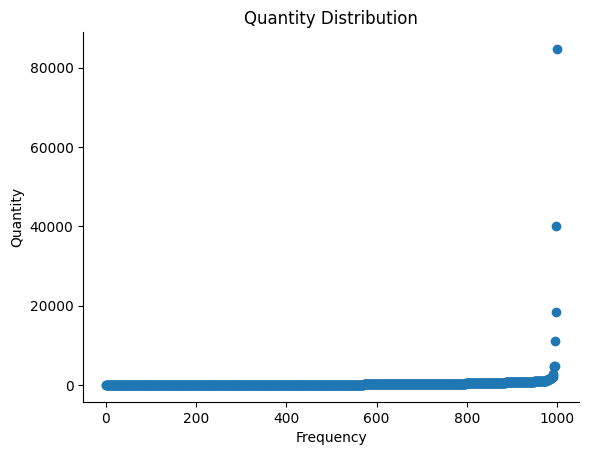

In [ ]:
plt.scatter(range(sample_data.shape[0]), np.sort(sample_data['Quantity'].values))
plt.xlabel('Frequency')
plt.ylabel('Quantity')
plt.title("Quantity Distribution")
sns.despine()
plt.show()

<ipython-input-89-7fea1cd3685a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_data['Quantity'])


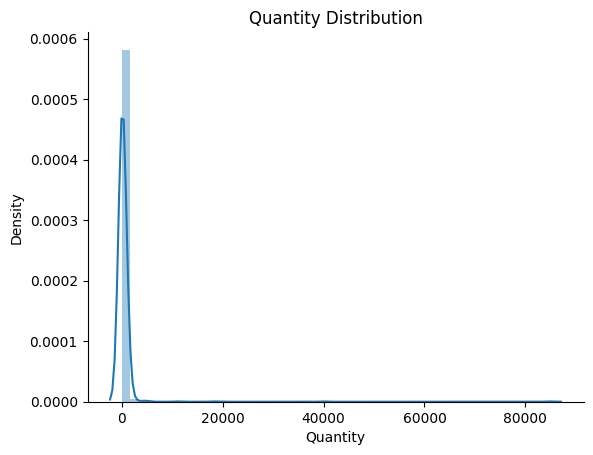

In [ ]:
sns.distplot(sample_data['Quantity'])
plt.title("Quantity Distribution")
sns.despine()
plt.show()

In [ ]:
print("Skewness: %f" % sample_data['Quantity'].skew())
print("Kurtosis: %f" % sample_data['Quantity'].kurt())

Skewness: 23.620486
Kurtosis: 614.351707


#Isolation Forest

In [ ]:
features = ['quantity_log','Month','Day','Trade_Frequency','Cumulative_Volume','Avg_Transaction_Size','Volume_to_Transaction_Ratio', 'Amount_Discrepancy','Degree Centrality','Betweenness Centrality','Closeness Centrality']

X = data[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data (80% training, 20% testing)
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)



In [ ]:
# Initialize and fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, max_samples=256, random_state=42)
iso_forest.fit(X_train)

# Predict anomalies
y_pred = iso_forest.predict(X_scaled)



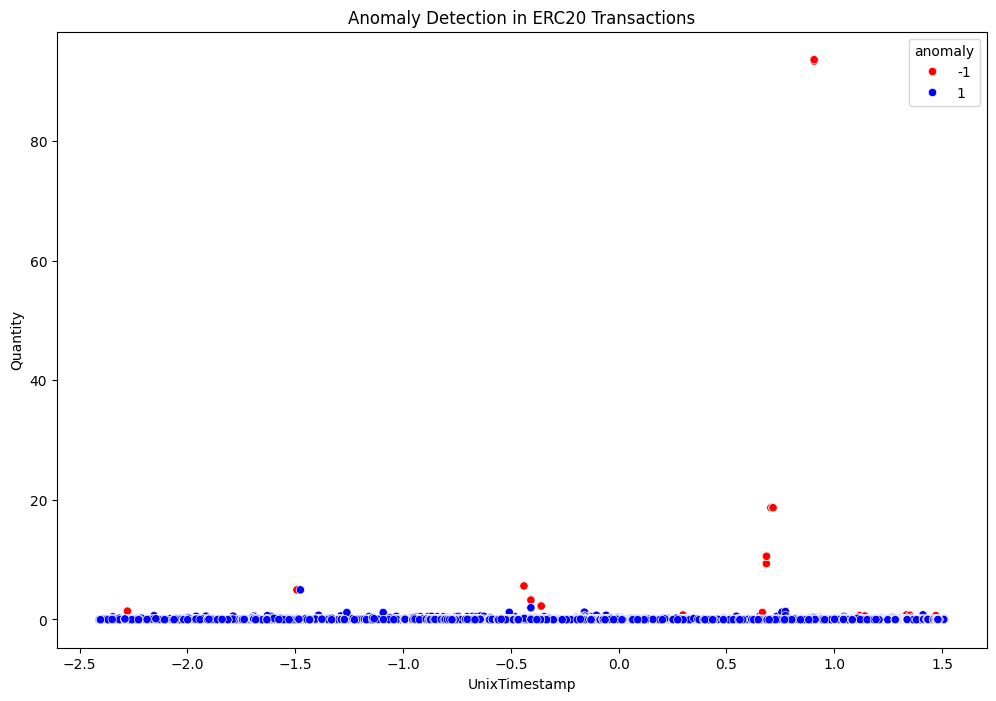

anomaly
 1    19641
-1      195
Name: count, dtype: int64


In [ ]:
# Add predictions to the original dataframe
data['anomaly'] = y_pred

# Visualize anomalies
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='UnixTimestamp', y='Quantity', hue='anomaly', palette={1: 'blue', -1: 'red'})
plt.title('Anomaly Detection in ERC20 Transactions')
plt.show()

# Print anomaly statistics
print(data['anomaly'].value_counts())





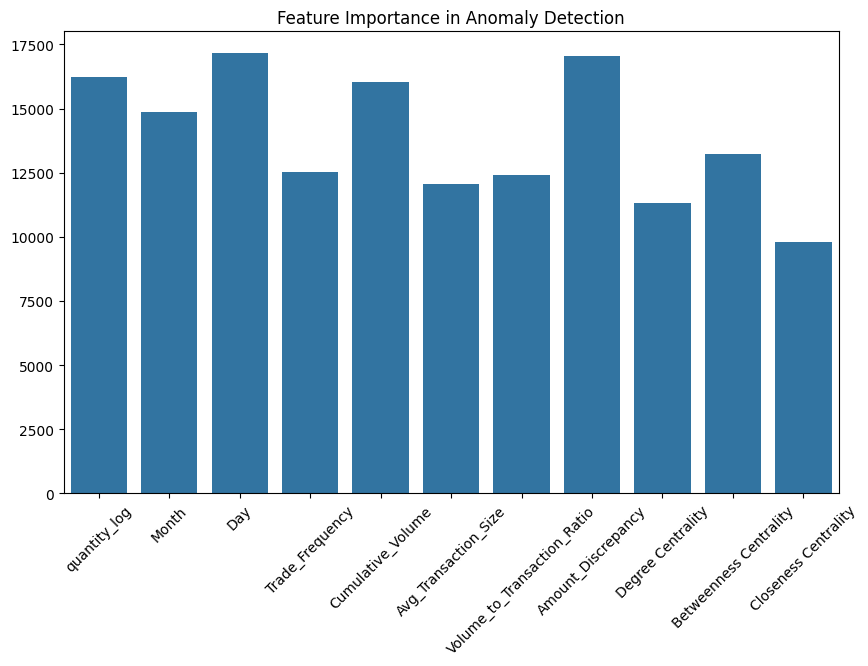

In [ ]:
def get_feature_importance(iso_forest, X):
    n_samples, n_features = X.shape
    feature_importance = np.zeros(n_features)

    for tree in iso_forest.estimators_:
        leaves_index = tree.apply(X)
        node_indicator = tree.decision_path(X)
        n_nodes = tree.tree_.node_count

        for i in range(n_nodes):
            if tree.tree_.feature[i] != -2:  # not a leaf node
                feature = tree.tree_.feature[i]
                feature_importance[feature] += node_indicator[:, i].sum()

    return feature_importance / len(iso_forest.estimators_)

feature_importance = get_feature_importance(iso_forest, X_scaled)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=feature_importance)
plt.title('Feature Importance in Anomaly Detection')
plt.xticks(rotation=45)
plt.show()


#Outlier detection


In [ ]:
from scipy.stats import zscore
# Calculate z-scores for numeric columns
data['Z_Quantity'] = zscore(df['Quantity'])

# Define threshold for outliers
threshold = 3

# Find outliers
outliers = data[abs(data['Z_Quantity']) > threshold]

# Sort outliers by absolute z-score
outliers = outliers.assign(abs_zscore=abs(outliers['Z_Quantity'])).sort_values('abs_zscore', ascending=False)


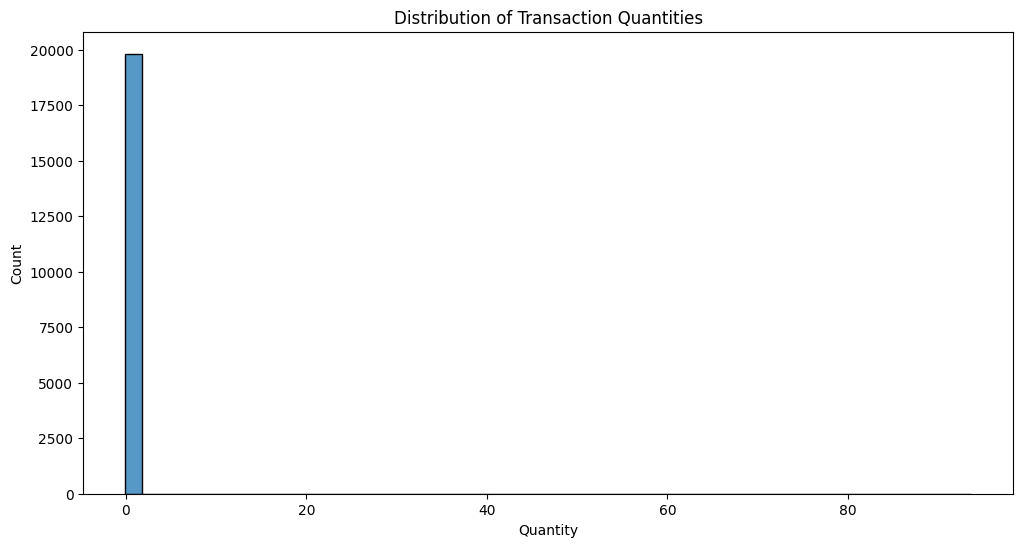

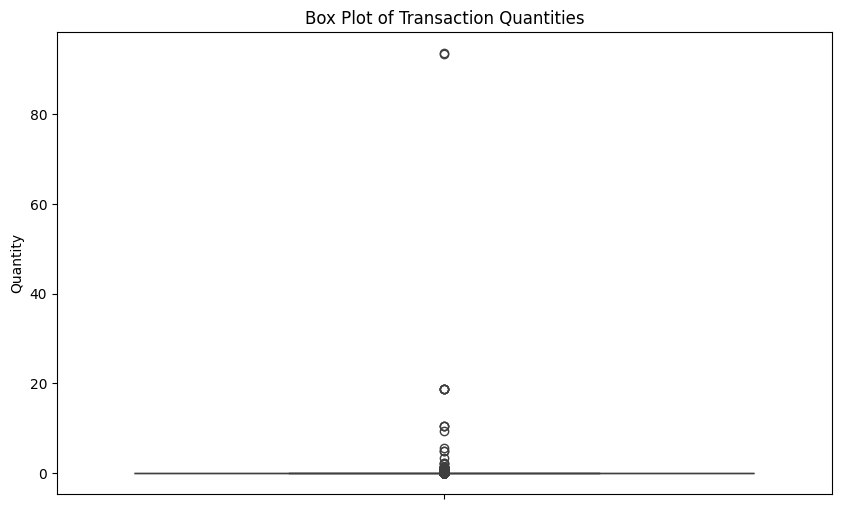

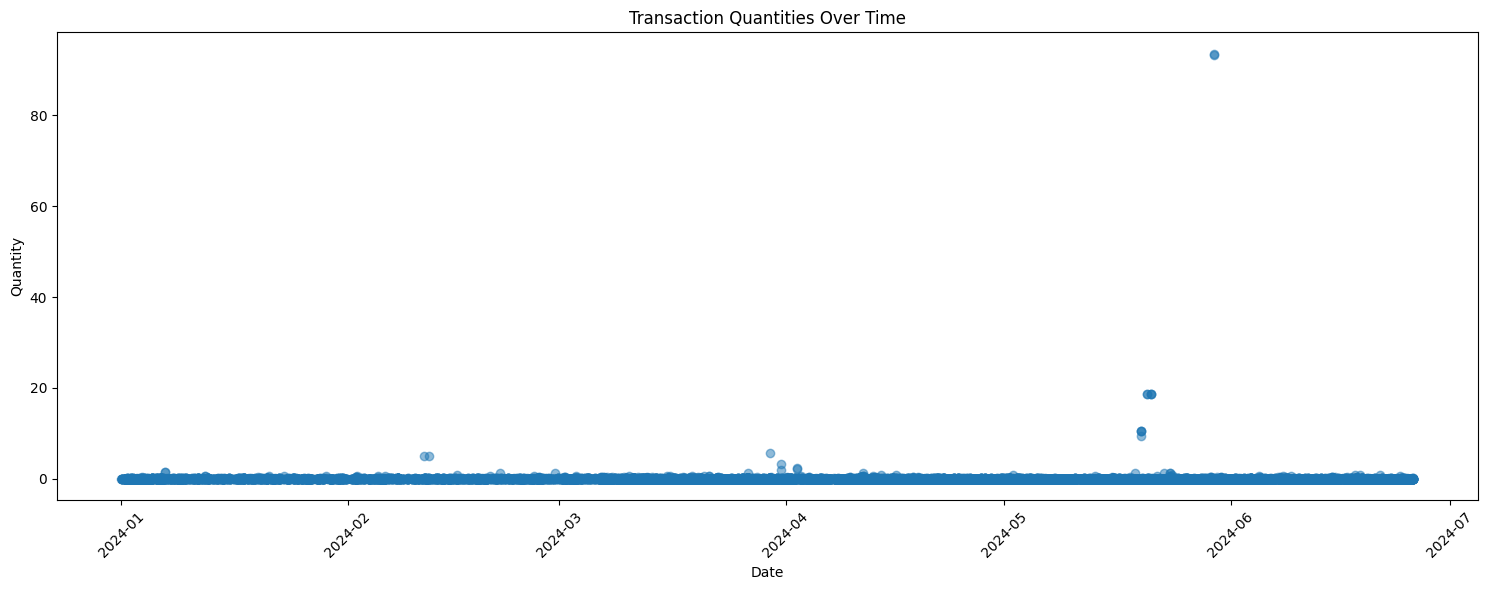

In [ ]:
# Plot distribution of transaction quantities
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Quantity', bins=50)
plt.title('Distribution of Transaction Quantities')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()

# Box plot for quantities
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, y='Quantity')
plt.title('Box Plot of Transaction Quantities')
plt.show()

# Scatter plot of transactions over time
plt.figure(figsize=(15, 6))
plt.scatter(df['DateTime (UTC)'], data['Quantity'], alpha=0.5)
plt.title('Transaction Quantities Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Get summary statistics of outlier transactions
outlier_stats = {
    'Total Outlier Transactions': len(outliers),
    'Percentage of Outliers': (len(outliers) / len(data)) * 100,
    'Max Quantity': outliers['Quantity'].max(),
    'Min Quantity': outliers['Quantity'].min(),
    'Mean Quantity': outliers['Quantity'].mean()
}

# Display top outliers
print("\nTop 10 Outlier Transactions:")
cols_to_display = ['DateTime (UTC)', 'From', 'To', 'Quantity', 'Method', 'Z_Quantity']
print(outliers[cols_to_display].head(10))

# Group outliers by method
method_analysis = outliers.groupby('Method')['Quantity'].agg(['count', 'mean', 'sum']).sort_values('count', ascending=False)
print("\nOutlier Transactions by Method:")
print(method_analysis)


Top 10 Outlier Transactions:
           DateTime (UTC)                                        From  \
19808 2024-05-29 15:39:35  0xfbf9e10ebb9f3b518f3329fcb416821c35b720a5   
583   2024-05-29 15:40:47  0x0d3808852473db55e5c0d6528483b2514f5ec680   
208   2024-05-20 14:10:59  0x0000000000000000000000000000000000000000   
209   2024-05-20 14:11:35  0x0000000000000000000000000000000000000000   
211   2024-05-21 01:11:11  0x0000000000000000000000000000000000000000   
212   2024-05-21 01:11:35  0x0000000000000000000000000000000000000000   
213   2024-05-21 01:12:11  0x0000000000000000000000000000000000000000   
19806 2024-05-19 16:09:35  0xfbf9e10ebb9f3b518f3329fcb416821c35b720a5   
19807 2024-05-19 16:12:47  0xfbf9e10ebb9f3b518f3329fcb416821c35b720a5   
581   2024-05-19 16:14:23  0x0d3808852473db55e5c0d6528483b2514f5ec680   

                                               To   Quantity  \
19808  0x0d3808852473db55e5c0d6528483b2514f5ec680  93.619164   
583    0xfa7093cdd9ee6932b4eb2c9e1cde7

In [ ]:
# Analyze addresses involved in outlier transactions
address_analysis = pd.DataFrame({
    'From_Count': outliers['From'].value_counts(),
    'To_Count': outliers['To'].value_counts()
})

print("\nTop Addresses Involved in Outlier Transactions:")
print("\nTop Senders:")
print(address_analysis['From_Count'].head())
print("\nTop Recipients:")
print(address_analysis['To_Count'].head())



Top Addresses Involved in Outlier Transactions:

Top Senders:
0x0000000000000000000000000000000000000000    8.0
0x0d3808852473db55e5c0d6528483b2514f5ec680    2.0
0xcc7344a557cdb86f7c713527c05eaf7906e1abab    1.0
0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea    NaN
0xfa7093cdd9ee6932b4eb2c9e1cde7ce00b1fa4b9    NaN
Name: From_Count, dtype: float64

Top Recipients:
0x0000000000000000000000000000000000000000    1
0x0d3808852473db55e5c0d6528483b2514f5ec680    2
0xcc7344a557cdb86f7c713527c05eaf7906e1abab    1
0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea    1
0xfa7093cdd9ee6932b4eb2c9e1cde7ce00b1fa4b9    2
Name: To_Count, dtype: int64


#LOF

In [ ]:
features = ['quantity_log','Year','Month','Day','Trade_Frequency','Cumulative_Volume','Avg_Transaction_Size','Volume_to_Transaction_Ratio', 'Amount_Discrepancy','Degree Centrality','Betweenness Centrality','Closeness Centrality']

In [ ]:
# Initialize LOF detector
lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')

# Prepare features for LOF
X = data[features].values
X = StandardScaler().fit_transform(X)

# Fit LOF and get outlier scores
outlier_scores = -lof.fit_predict(X)
outlier_factor = -lof.negative_outlier_factor_

# Add LOF scores to dataframe
data['LOF_Score'] = outlier_factor
data['Is_Outlier'] = outlier_scores


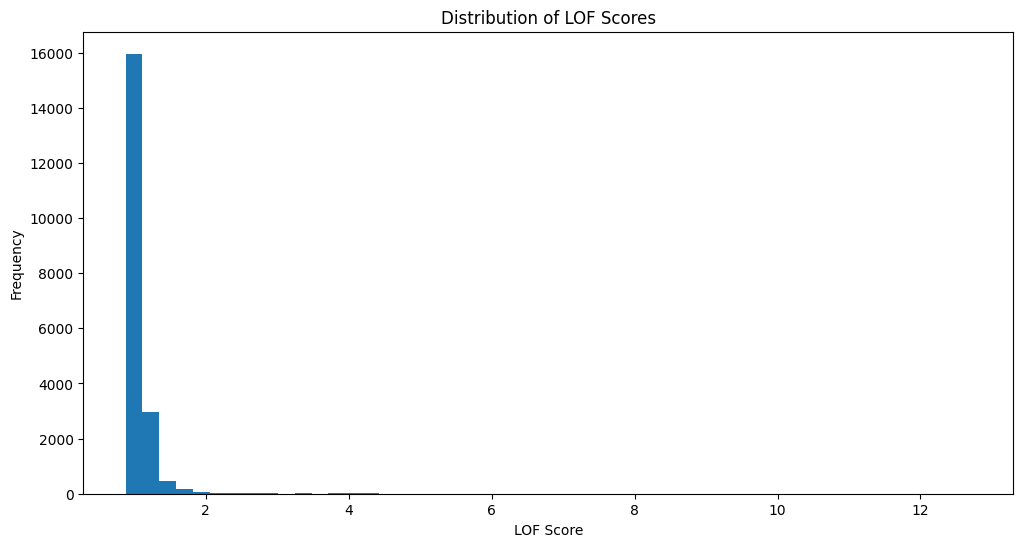

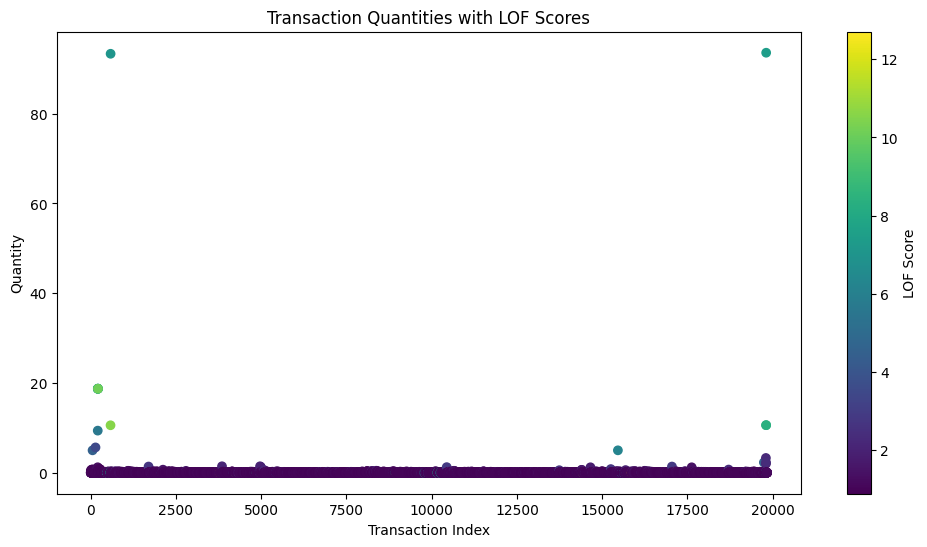

In [ ]:
# Plot LOF scores distribution
plt.figure(figsize=(12, 6))
plt.hist(data['LOF_Score'], bins=50)
plt.title('Distribution of LOF Scores')
plt.xlabel('LOF Score')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of transactions with LOF scores
plt.figure(figsize=(12, 6))
plt.scatter(data.index, df['Quantity'], c=data['LOF_Score'], cmap='viridis')
plt.colorbar(label='LOF Score')
plt.title('Transaction Quantities with LOF Scores')
plt.xlabel('Transaction Index')
plt.ylabel('Quantity')
plt.show()



Outlier Transactions by Method:
                                       count       mean         sum
Method                                                             
-                                        154   0.051473    7.926767
0x00000000                                 2   0.000954    0.001908
0x415565b0                               158  -0.023373   -3.692860
Aggregate                                  1  -0.044937   -0.044937
Delegate                                   1   0.015775    0.015775
Exec                                       1  -0.013167   -0.013167
Exec Transaction                           7   1.414332    9.900324
Execute                                   74  -0.011256   -0.832977
Execute Meta Transaction V2                1  -0.047147   -0.047147
External Swap                              4   0.201557    0.806227
Fill Quote Token To Token                  1  -0.020519   -0.020519
Finalise Near To Eth Transfer             15   7.567621  113.514311
Insert Cool Tex

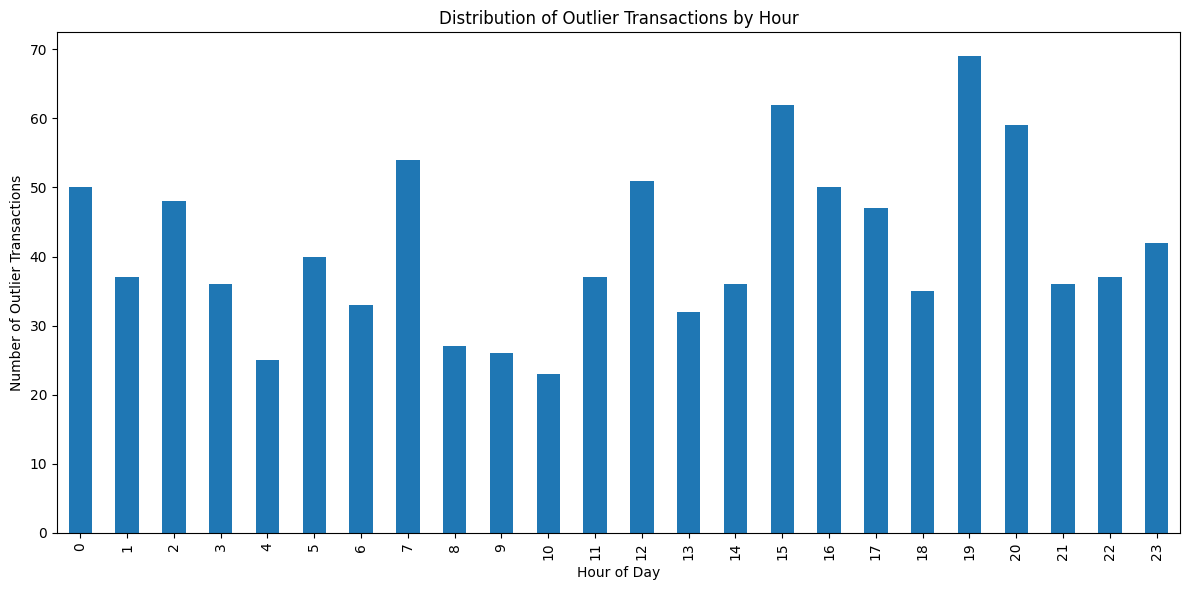

In [ ]:
# Identify top outliers
outlier_threshold = np.percentile(data['LOF_Score'], 95)
outliers = data[data['LOF_Score'] > outlier_threshold].copy()

# Sort outliers by LOF score
outliers = outliers.sort_values('LOF_Score', ascending=False)

# Analyze outliers by method
method_analysis = outliers.groupby('Method')['Quantity'].agg(['count', 'mean', 'sum'])
print("\nOutlier Transactions by Method:")
print(method_analysis)

# Time-based analysis of outliers
outliers['Hour'] = outliers['DateTime (UTC)'].dt.hour
hourly_outliers = outliers.groupby('Hour')['Quantity'].count()

plt.figure(figsize=(12, 6))
hourly_outliers.plot(kind='bar')
plt.title('Distribution of Outlier Transactions by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Outlier Transactions')
plt.tight_layout()
plt.show()


In [ ]:
# Generate detailed report for top outliers
def generate_outlier_report(outliers, n=10):
    print(f"\nTop {n} Most Anomalous Transactions:")
    for idx, row in outliers.head(n).iterrows():
        print(f"\nTransaction Details:")
        print(f"DateTime: {row['DateTime (UTC)']}")
        print(f"From: {row['From']}")
        print(f"To: {row['To']}")
        print(f"Quantity: {row['Quantity']}")
        print(f"Method: {row['Method']}")
        print(f"LOF Score: {row['LOF_Score']:.4f}")

generate_outlier_report(outliers)



Top 10 Most Anomalous Transactions:

Transaction Details:
DateTime: 2024-06-22 12:16:11
From: 0x23dba1c38a4c04e4d56d741514b0b1f6dc81f648
To: 0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea
Quantity: -0.04713845827348247
Method: Execute
LOF Score: 12.7068

Transaction Details:
DateTime: 2024-06-20 23:32:47
From: 0xe2e93f64b40e70ba43cd3cc1ba61727d09ba4dc7
To: 0x5f02de7cdd555d6a47d8451d0a58796a62fdb0c8
Quantity: -0.046984228515779984
Method: Transfer
LOF Score: 12.6358

Transaction Details:
DateTime: 2024-06-23 18:34:59
From: 0x9ba3f47fe7f5a12562ba0a4a5645d8bf9ea1dd8e
To: 0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad
Quantity: -0.047066927722616045
Method: Execute
LOF Score: 11.7111

Transaction Details:
DateTime: 2024-06-20 23:15:11
From: 0x72774550a5fecbcb677ff171d7ca348011244d72
To: 0x6469b34a2a4723163c4902dbbdea728d20693c12
Quantity: -0.0469708579242976
Method: Unoswap
LOF Score: 10.7940

Transaction Details:
DateTime: 2024-05-19 16:14:23
From: 0x0d3808852473db55e5c0d6528483b2514f5ec680
To: 

In [ ]:
# Analyze addresses involved in outlier transactions
address_analysis = pd.DataFrame({
    'From_Count': outliers['From'].value_counts(),
    'To_Count': outliers['To'].value_counts(),
    'Total_Volume_From': outliers.groupby('From')['Quantity'].sum(),
    'Total_Volume_To': outliers.groupby('To')['Quantity'].sum()
})

print("\nTop Addresses Involved in Anomalous Transactions:")
print("\nTop Senders:")
print(address_analysis['From_Count'].head())
print("\nTop Recipients:")
print(address_analysis['To_Count'].head())



Top Addresses Involved in Anomalous Transactions:

Top Senders:
0x0000000000000000000000000000000000000000    15.0
0x00000000003b3cc22af3ae1eac0440bcee416b40     NaN
0x00000000009e50a7ddb7a7b0e2ee6604fd120e49     1.0
0x000000000c1500d6cf5a65167f131a53c82c1033     3.0
0x00000047bb99ea4d791bb749d970de71ee0b1a34     1.0
Name: From_Count, dtype: float64

Top Recipients:
0x0000000000000000000000000000000000000000    22.0
0x00000000003b3cc22af3ae1eac0440bcee416b40     1.0
0x00000000009e50a7ddb7a7b0e2ee6604fd120e49     NaN
0x000000000c1500d6cf5a65167f131a53c82c1033     2.0
0x00000047bb99ea4d791bb749d970de71ee0b1a34     NaN
Name: To_Count, dtype: float64


#LOF & DBSCAN


In [ ]:
# Configure LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')
outlier_labels = lof.fit_predict(X)
outlier_scores = -lof.negative_outlier_factor_

# Add LOF scores to dataframe
data['LOF_Score'] = outlier_scores
data['Is_LOF_Outlier'] = outlier_labels == -1


In [ ]:
# Configure DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_labels = dbscan.fit_predict(X)

# Add DBSCAN labels to dataframe
data['DBSCAN_Cluster'] = cluster_labels
data['Is_DBSCAN_Outlier'] = cluster_labels == -1


In [ ]:
# Identify transactions flagged by both methods
data['Is_Combined_Outlier'] = data['Is_LOF_Outlier'] & data['Is_DBSCAN_Outlier']

# Calculate statistics for outlier transactions
outlier_stats = {
    'LOF_Outliers': data['Is_LOF_Outlier'].sum(),
    'DBSCAN_Outliers': data['Is_DBSCAN_Outlier'].sum(),
    'Combined_Outliers': data['Is_Combined_Outlier'].sum()
}

# Analyze outlier transactions by method
print("\nOutlier Analysis by Method:")
for method, count in outlier_stats.items():
    print(f"{method}: {count}")



Outlier Analysis by Method:
LOF_Outliers: 541
DBSCAN_Outliers: 450
Combined_Outliers: 108


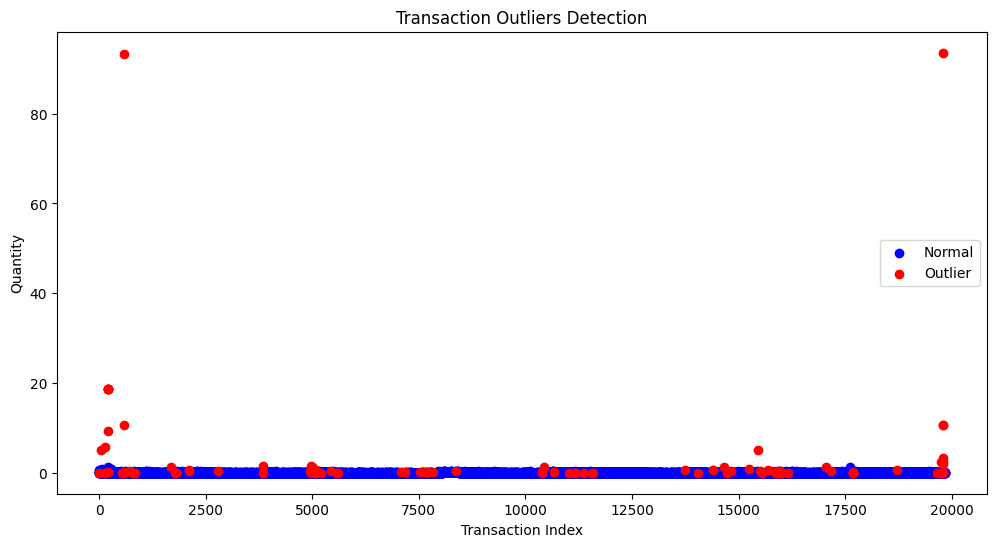

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(data.index[~data['Is_Combined_Outlier']],
           data['Quantity'][~data['Is_Combined_Outlier']],
           c='blue', label='Normal')
plt.scatter(data.index[data['Is_Combined_Outlier']],
           data['Quantity'][data['Is_Combined_Outlier']],
           c='red', label='Outlier')
plt.title('Transaction Outliers Detection')
plt.xlabel('Transaction Index')
plt.ylabel('Quantity')
plt.legend()
plt.show()


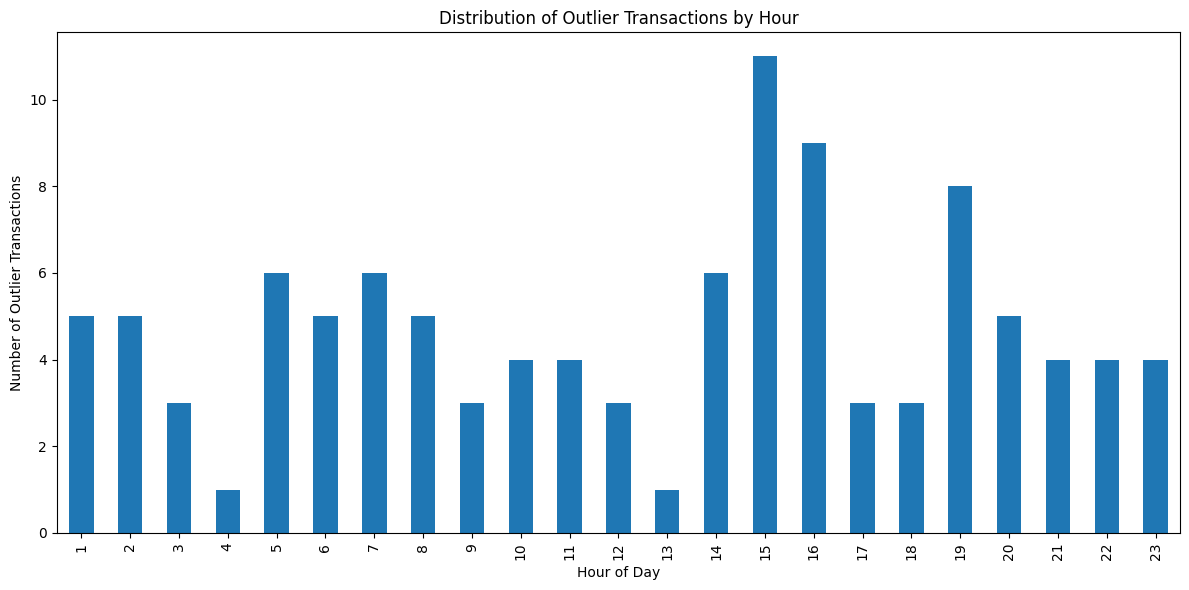

In [ ]:
# Add time-based features
data['Hour'] = data['DateTime (UTC)'].dt.hour
data['Day'] = data['DateTime (UTC)'].dt.day
data['DayOfWeek'] = data['DateTime (UTC)'].dt.day_name()

# Analyze outliers by hour
plt.figure(figsize=(12, 6))
outlier_by_hour = data[data['Is_Combined_Outlier']].groupby('Hour').size()
outlier_by_hour.plot(kind='bar')
plt.title('Distribution of Outlier Transactions by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Outlier Transactions')
plt.tight_layout()
plt.show()


In [ ]:
# Analyze addresses involved in outlier transactions
outlier_df = data[data['Is_Combined_Outlier']]
address_analysis = pd.DataFrame({
    'From_Count': outlier_df['From'].value_counts(),
    'To_Count': outlier_df['To'].value_counts(),
    'Total_Volume_From': outlier_df.groupby('From')['Quantity'].sum(),
    'Total_Volume_To': outlier_df.groupby('To')['Quantity'].sum()
})

print("\nTop Addresses Involved in Anomalous Transactions:")
print("\nTop Senders:")
print(address_analysis['From_Count'].head())
print("\nTop Recipients:")
print(address_analysis['To_Count'].head())



Top Addresses Involved in Anomalous Transactions:

Top Senders:
0x0000000000000000000000000000000000000000    11.0
0x00000000003b3cc22af3ae1eac0440bcee416b40     NaN
0x053b3ad83427f4a48014dd65b7a4cc85350448a7     NaN
0x0947fa42b161c952ae6f722efb60abc13aed7f32     1.0
0x0d3808852473db55e5c0d6528483b2514f5ec680     6.0
Name: From_Count, dtype: float64

Top Recipients:
0x0000000000000000000000000000000000000000    8.0
0x00000000003b3cc22af3ae1eac0440bcee416b40    1.0
0x053b3ad83427f4a48014dd65b7a4cc85350448a7    1.0
0x0947fa42b161c952ae6f722efb60abc13aed7f32    NaN
0x0d3808852473db55e5c0d6528483b2514f5ec680    3.0
Name: To_Count, dtype: float64


In [ ]:
def generate_method_comparison():
    comparison = pd.DataFrame({
        'LOF_Only': data['Is_LOF_Outlier'] & ~data['Is_DBSCAN_Outlier'],
        'DBSCAN_Only': ~data['Is_LOF_Outlier'] & data['Is_DBSCAN_Outlier'],
        'Both_Methods': data['Is_Combined_Outlier']
    })

    method_stats = {
        'Transaction_Count': comparison.sum(),
        # Use boolean indexing for each column of 'comparison'
        'Avg_Transaction_Size': [data['Quantity'][comparison['LOF_Only']].mean(),
                                 data['Quantity'][comparison['DBSCAN_Only']].mean(),
                                 data['Quantity'][comparison['Both_Methods']].mean()],
        'Max_Transaction_Size': [data['Quantity'][comparison['LOF_Only']].max(),
                                 data['Quantity'][comparison['DBSCAN_Only']].max(),
                                 data['Quantity'][comparison['Both_Methods']].max()]
    }

    # Transpose the DataFrame for better readability
    return pd.DataFrame(method_stats, index=['LOF_Only', 'DBSCAN_Only', 'Both_Methods']).T
print("\nMethod Comparison Statistics:")
print(generate_method_comparison())


Method Comparison Statistics:
                        LOF_Only  DBSCAN_Only  Both_Methods
Transaction_Count     433.000000   342.000000    108.000000
Avg_Transaction_Size    0.001755     0.038932      3.378203
Max_Transaction_Size    0.379513     1.169962     93.619164


#SVM

In [ ]:
# Normalize the data
scaler = MinMaxScaler()
X = scaler.fit_transform(data[features])

# Custom scoring function (fraction of normal points)
def unsupervised_scorer(estimator, X):
    try:
        predictions = estimator.predict(X)
        normal_fraction = np.mean(predictions == 1)  # Fraction of normal points
        return normal_fraction
    except Exception as e:
        print(f"Error in scoring: {e}")
        return 0


param_grid = {
    "nu": [0.01, 0.02, 0.03],  # Smaller steps for nu
    "gamma": [0.01, 0.05, 0.1],  # Narrow range
    "kernel": ["rbf"]  # Focus on one kernel for simplicity
}

# Initialize One-Class SVM
ocsvm = OneClassSVM()

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=ocsvm,
    param_grid=param_grid,
    scoring=unsupervised_scorer,  # Custom scoring function
    cv=3,  # Cross-validation folds
    verbose=1
)

grid_search.fit(X)

# Retrieve the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train the best model with the best parameters
best_model = grid_search.best_estimator_

# Predict anomalies
predictions = best_model.predict(X)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameters: {'gamma': 0.01, 'kernel': 'rbf', 'nu': 0.01}
Best Score: 0.9722726356120185


In [ ]:
def apply_ocsvm(data, columns_for_ocsvm, kernel='rbf', nu=0.01, gamma='scale'):
    """
    Apply the One-Class SVM (OCSVM) method to identify anomalies.

    Parameters:
        data (DataFrame): The preprocessed DataFrame.
        columns_for_ocsvm (list): List of numerical column names for OCSVM calculation.
        kernel (str): Kernel type used in the algorithm.
        nu (float): An upper bound on the fraction of margin errors and a lower bound of the fraction of support vectors.
        gamma (str or float): Kernel coefficient for 'rbf', 'poly', and 'sigmoid'.

    Returns:
        DataFrame: DataFrame containing the anomalies.
    """
    ocsvm = OneClassSVM(kernel=kernel, nu=nu, gamma=gamma)
    # Fit the model
    ocsvm.fit(data[columns_for_ocsvm])
    # Predict anomalies
    data['OCSVM_Prediction'] = ocsvm.predict(data[columns_for_ocsvm])
    # Anomalies are labeled as -1
    anomalies = data[data['OCSVM_Prediction'] == -1]

    return anomalies
ocsvm_anomalies = apply_ocsvm(data, features, grid_search.best_params_['kernel'], grid_search.best_params_['nu'], grid_search.best_params_['gamma'])

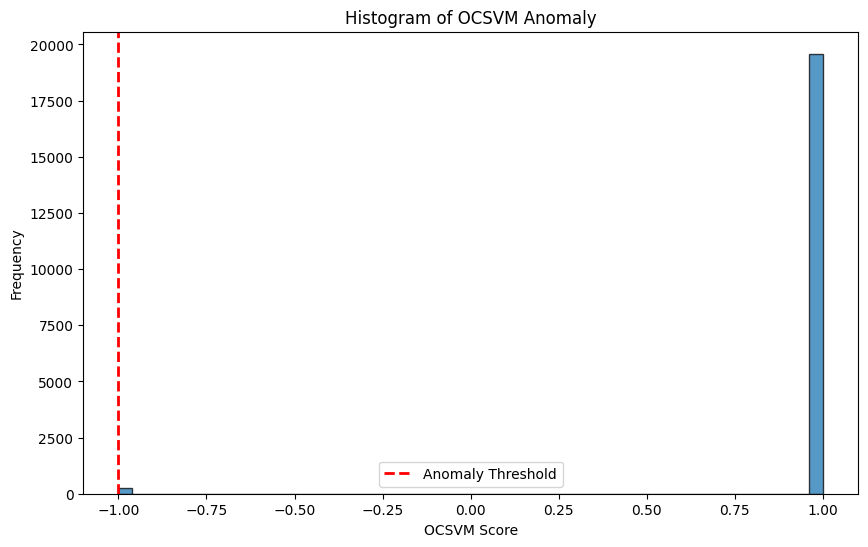

In [ ]:
# Plot histograms for OCSVM scores
plt.figure(figsize=(10, 6))
plt.hist(data['OCSVM_Prediction'], bins=50, alpha=0.75, edgecolor='black')

# Add a vertical line at -1
plt.axvline(x=-1, color='red', linestyle='--', linewidth=2, label='Anomaly Threshold')

plt.title('Histogram of OCSVM Anomaly')
plt.xlabel('OCSVM Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
if 'OCSVM_Prediction' in data.columns and len(features) >= 2:
    pairs_of_columns = [(features[i], features[j])
                    for i in range(len(features))
                    for j in range(i+1, len(features))]

for col1, col2 in pairs_of_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[col1],
                    y=data[col2],
                    hue=data['OCSVM_Prediction'],
                    palette={1: 'blue', -1: 'red'})
    plt.title(f'Anomaly Detection using One Class SVM: {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend(title='Anomaly')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.